Import Libraries

In [59]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Load and Check Data

In [60]:
df = pd.read_csv("/kaggle/input/telco-customer-churn-11-1-3/telco.csv")

In [62]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    
    print("\n##################### Columns #####################")
    print(dataframe.columns)
    
    print("\n##################### Info #####################")
    dataframe.info()
    
    print("##################### Types #####################")
    print(dataframe.dtypes)
    
    print("##################### Head #####################")
    print(dataframe.head())
    
    print("##################### Tail #####################")
    print(dataframe.tail())
    
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    
    print("##################### nunique #####################")
    print(dataframe.nunique())

In [63]:
check_df(df)

##################### Shape #####################
(7043, 50)

##################### Columns #####################
Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label'

In [64]:
df.describe([0.05,0.15,0.25,0.35,0.5,0.65,0.75,0.9,0.95]).T

,count,mean,std,min,5%,15%,25%,35%,50%,65%,75%,90%,95%,max
Age,7043.000,46.510,16.750,19.000,21.000,27.000,32.000,38.000,46.000,54.000,60.000,71.000,75.000,80.000
Number of Dependents,7043.000,0.469,0.963,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,3.000,9.000
Zip Code,7043.000,93486.071,1856.768,90001.000,90241.100,91356.000,92101.000,92406.400,93518.000,94618.000,95329.000,95834.800,96020.900,96150.000
Latitude,7043.000,36.197,2.469,32.556,32.887,33.760,33.991,34.146,36.205,37.672,38.161,39.457,40.497,41.962
Longitude,7043.000,-119.757,2.154,-124.301,-122.975,-122.241,-121.788,-121.114,-119.595,-118.296,-117.970,-117.148,-116.873,-114.193
Population,7043.000,22139.603,21152.393,11.000,227.000,813.000,2344.000,6439.000,17554.000,28318.000,36125.000,51213.000,62065.700,105285.000
Number of Referrals,7043.000,1.952,3.001,0.000,0.000,0.000,0.000,0.000,0.000,1.000,3.000,7.000,9.000,11.000
Tenure in Months,7043.000,32.387,24.542,1.000,1.000,4.000,9.000,15.000,29.000,45.000,55.000,69.000,72.000,72.000
Avg Monthly Long Distance Charges,7043.000,22.959,15.448,0.000,0.000,3.810,9.210,14.600,22.890,31.083,36.395,44.568,47.340,49.990
Avg Monthly GB Download,7043.000,20.515,20.419,0.000,0.000,0.000,3.000,9.000,17.000,23.000,27.000,53.000,69.000,85.000


Missing Value Analysis

In [76]:
df.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [94]:
print(df["Offer"].dtype)
print(df["Churn Category"].dtype)
print(df["Churn Reason"].dtype)
print(df["Internet Type"].dtype)

object
object
object
object


In [95]:
df["Offer"] = df["Offer"].fillna(value="Unknown")
df["Churn Category"] = df["Churn Category"].fillna(value="Unknown")
df["Internet Type"] = df["Internet Type"].fillna(value="Unknown")
df["Churn Reason"] = df["Churn Reason"].fillna(value="Unknown")

In [96]:
df.isna().sum()

Customer ID                          0
Gender                               0
Age                                  0
Under 30                             0
Senior Citizen                       0
Married                              0
Dependents                           0
Number of Dependents                 0
Country                              0
State                                0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Population                           0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download  

Univarite Variable Analysis

In [65]:
def column_detection(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n##################### Categoric #####################")
    print(cat_cols)
    print("\n##################### Numeric #####################")
    print(num_cols)
    print("\n##################### Categoric But Cardinal #####################")
    print(cat_but_car)
    print("\n##################### Numeric But Categoric #####################")
    print(num_but_cat)
    print("\n##################### Columns Overview #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [66]:
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)


##################### Categoric #####################
['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Country', 'State', 'Quarter', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status', 'Churn Label', 'Churn Category', 'Churn Reason', 'Satisfaction Score']

##################### Numeric #####################
['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Churn Score', 'CLTV']

##################### Categoric But Cardinal ######

Visualization of Categorical and Numerical Variables

        Gender  Ratio
Gender               
Male      3555 50.476
Female    3488 49.524


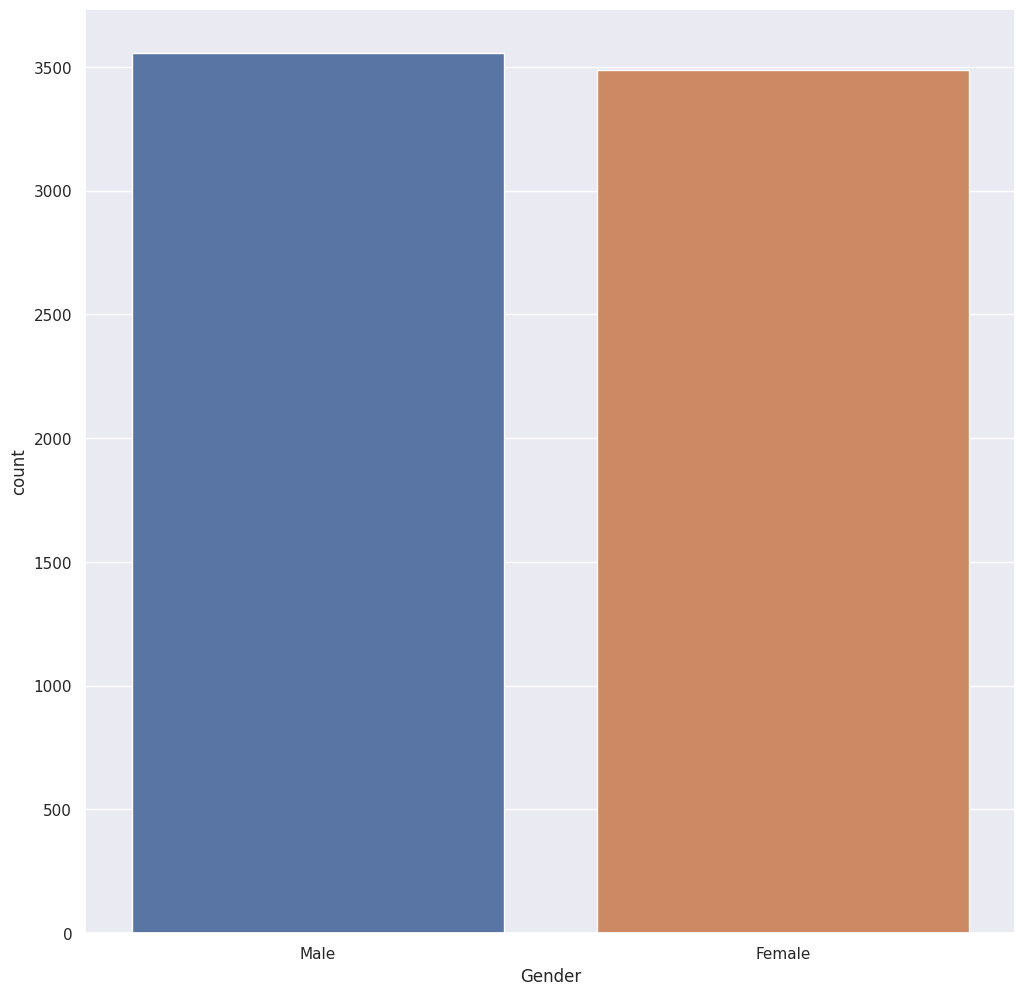

          Under 30  Ratio
Under 30                 
No            5642 80.108
Yes           1401 19.892


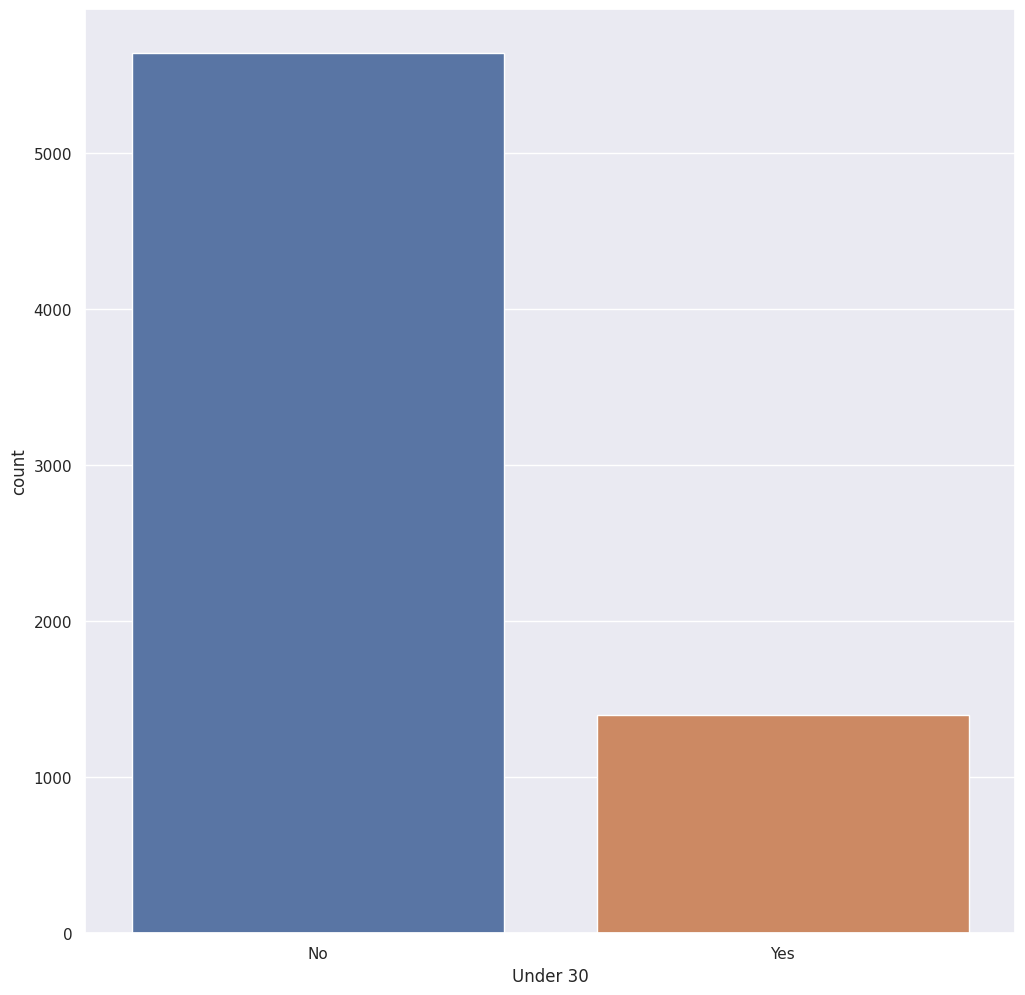

                Senior Citizen  Ratio
Senior Citizen                       
No                        5901 83.785
Yes                       1142 16.215


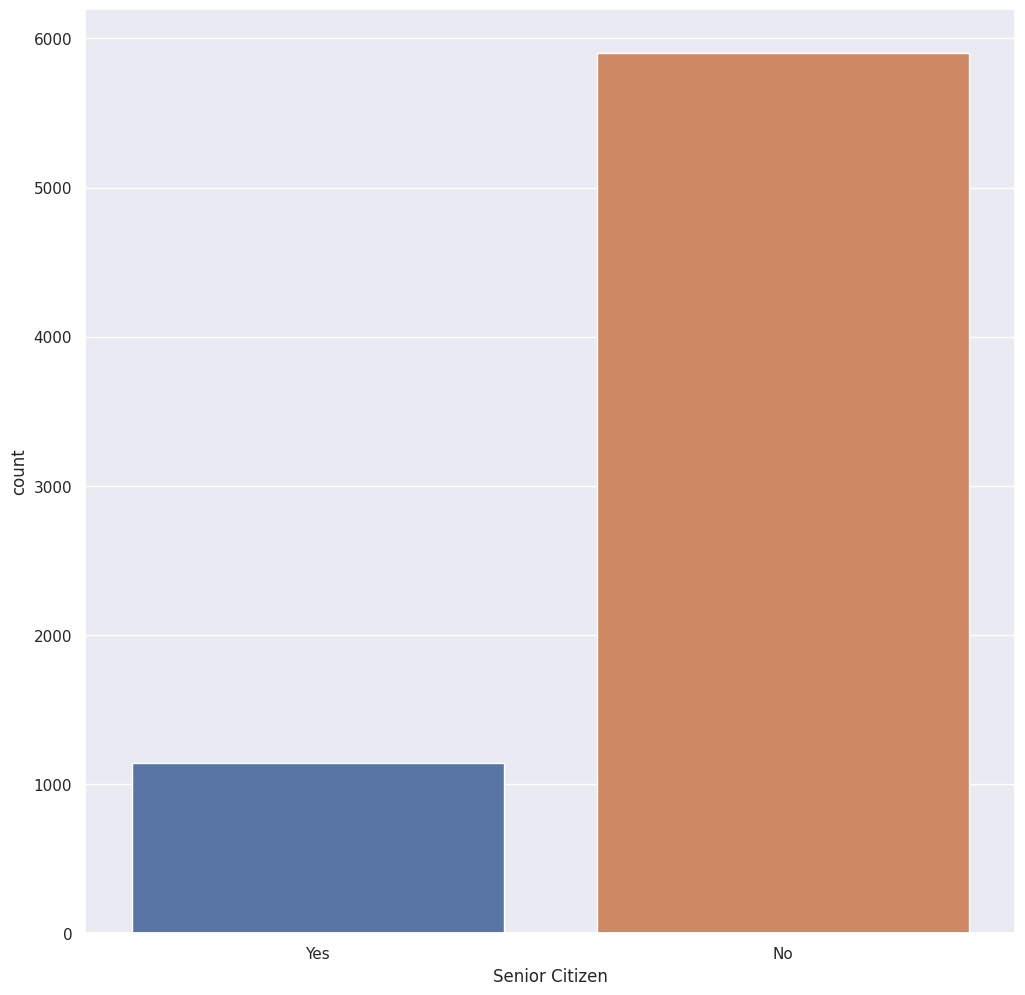

         Married  Ratio
Married                
No          3641 51.697
Yes         3402 48.303


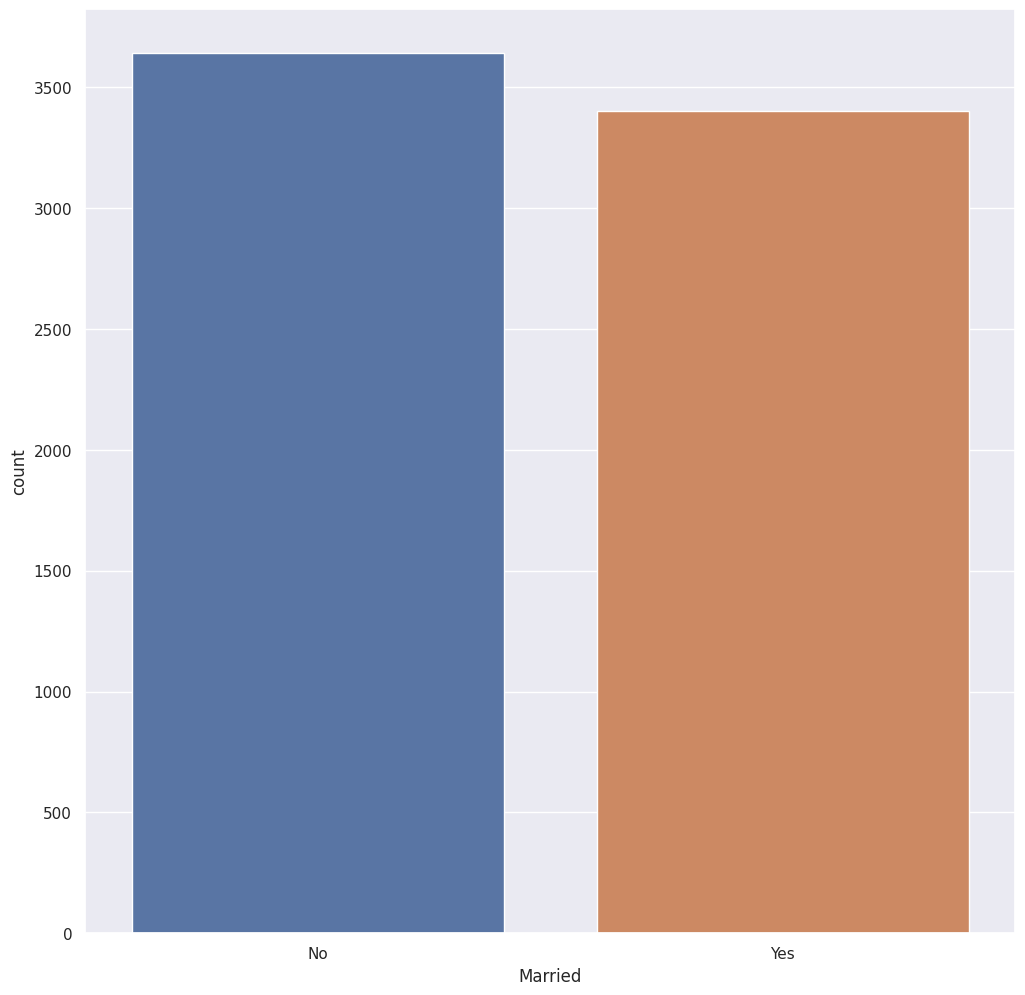

            Dependents  Ratio
Dependents                   
No                5416 76.899
Yes               1627 23.101


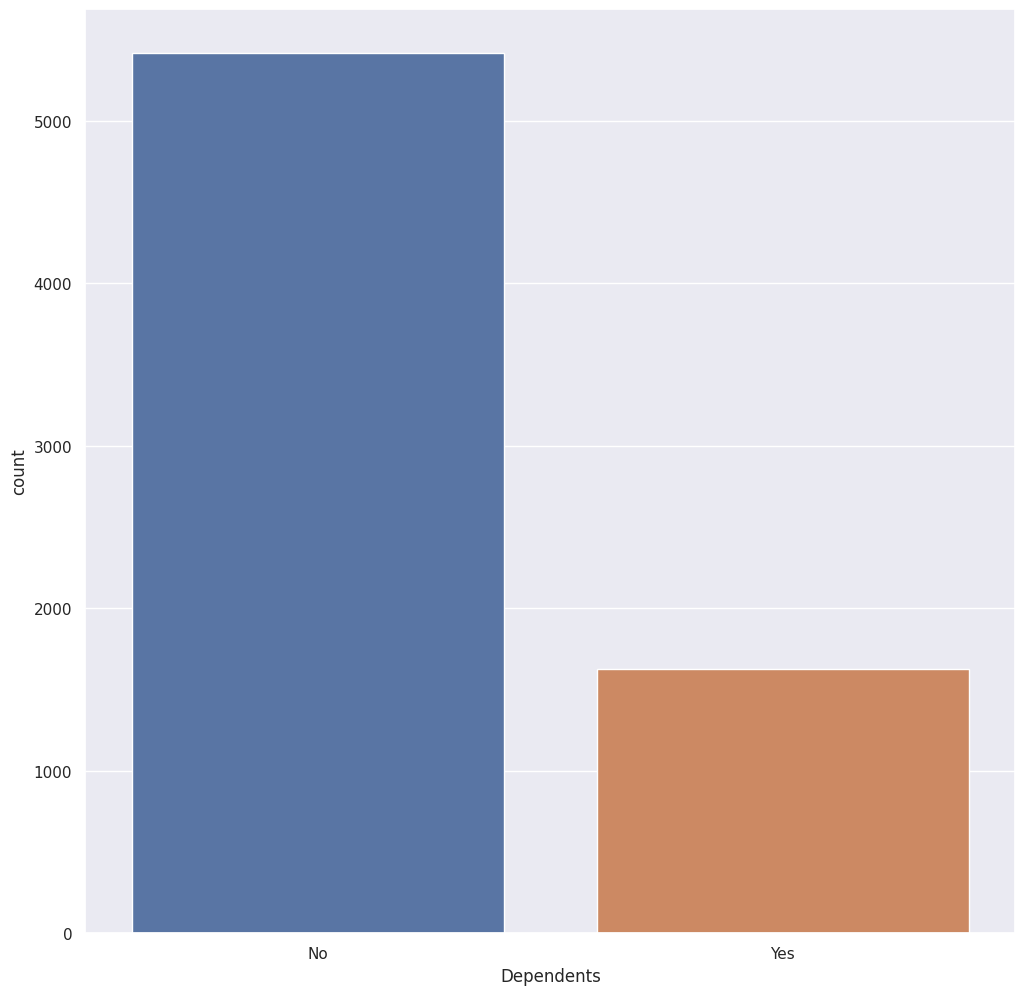

               Country   Ratio
Country                       
United States     7043 100.000


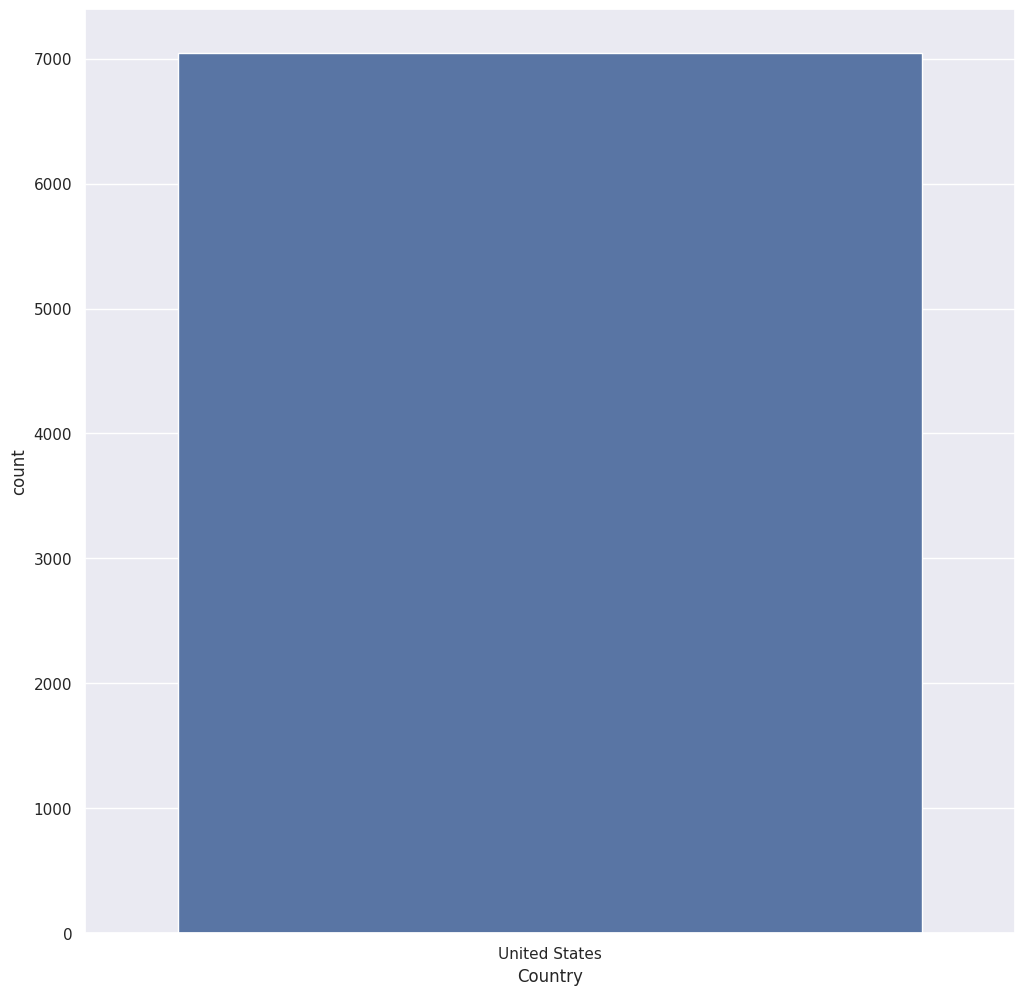

            State   Ratio
State                    
California   7043 100.000


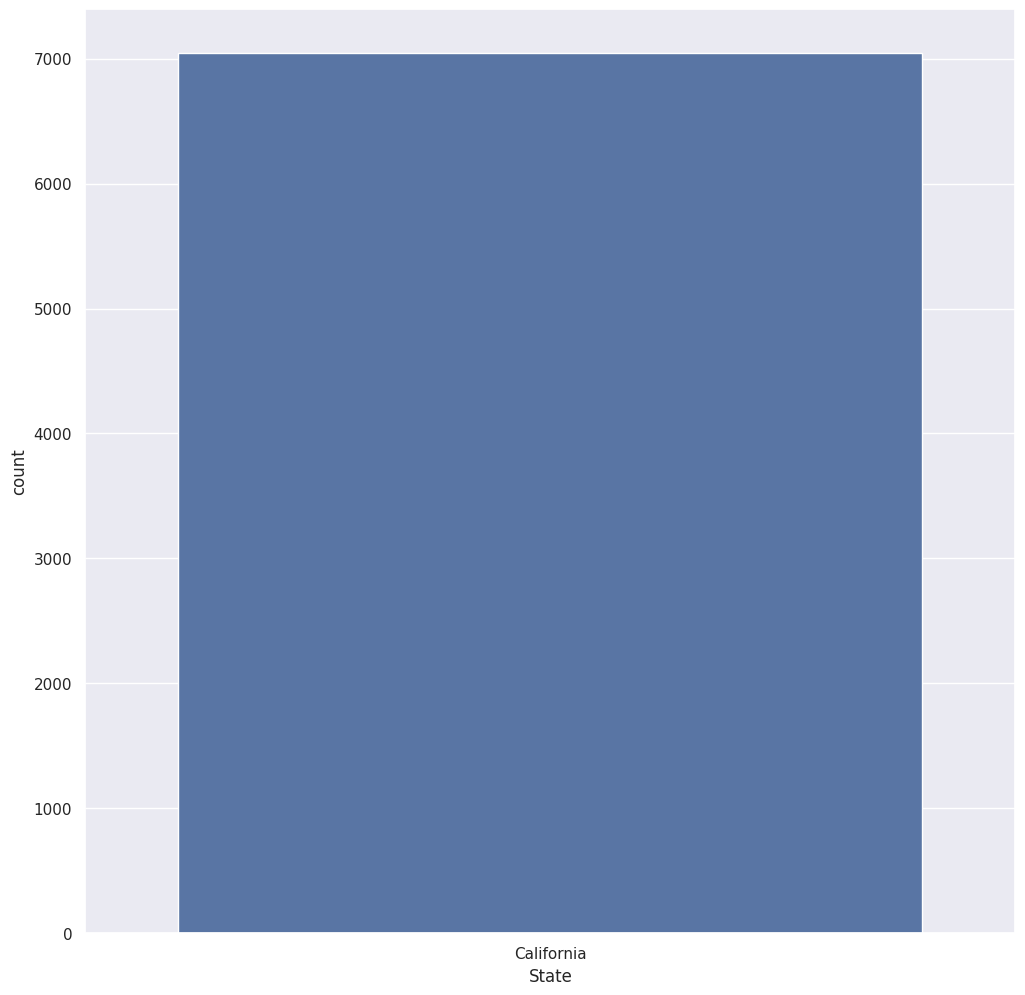

         Quarter   Ratio
Quarter                 
Q3          7043 100.000


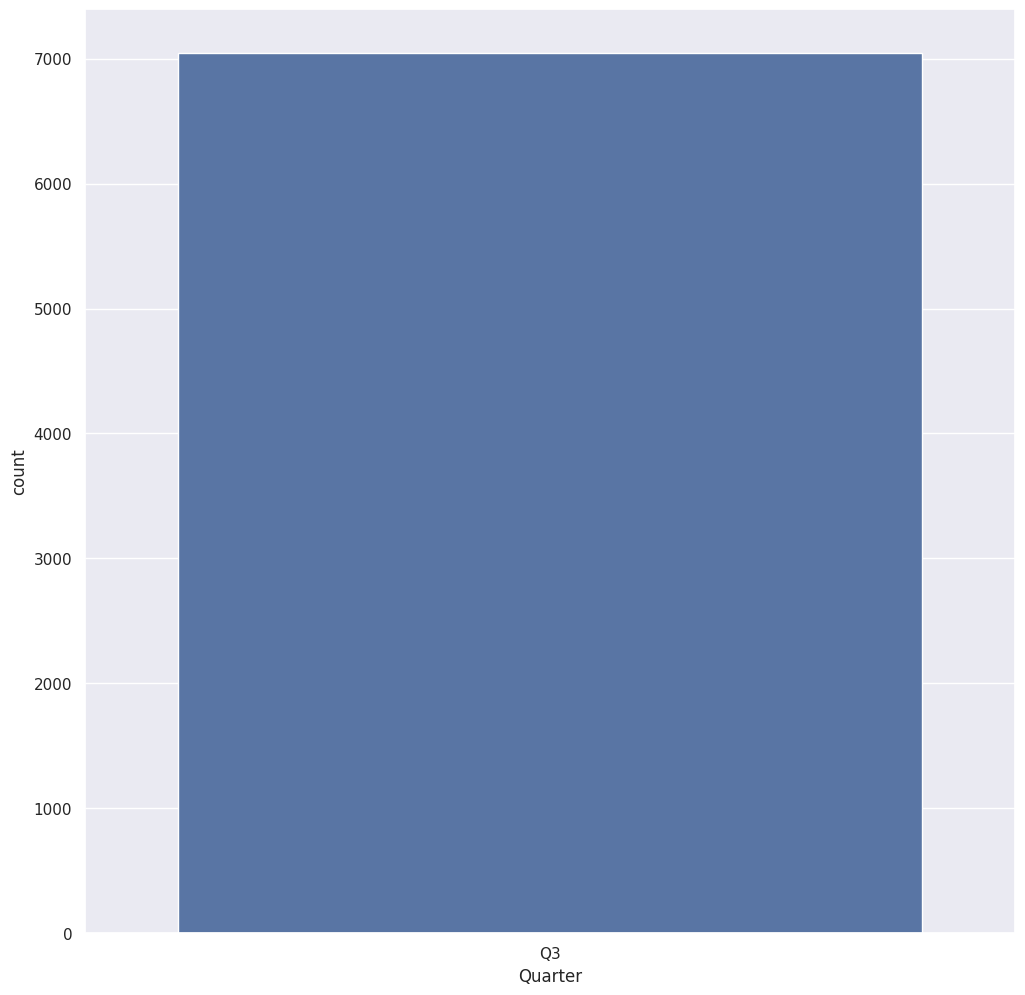

                   Referred a Friend  Ratio
Referred a Friend                          
No                              3821 54.252
Yes                             3222 45.748


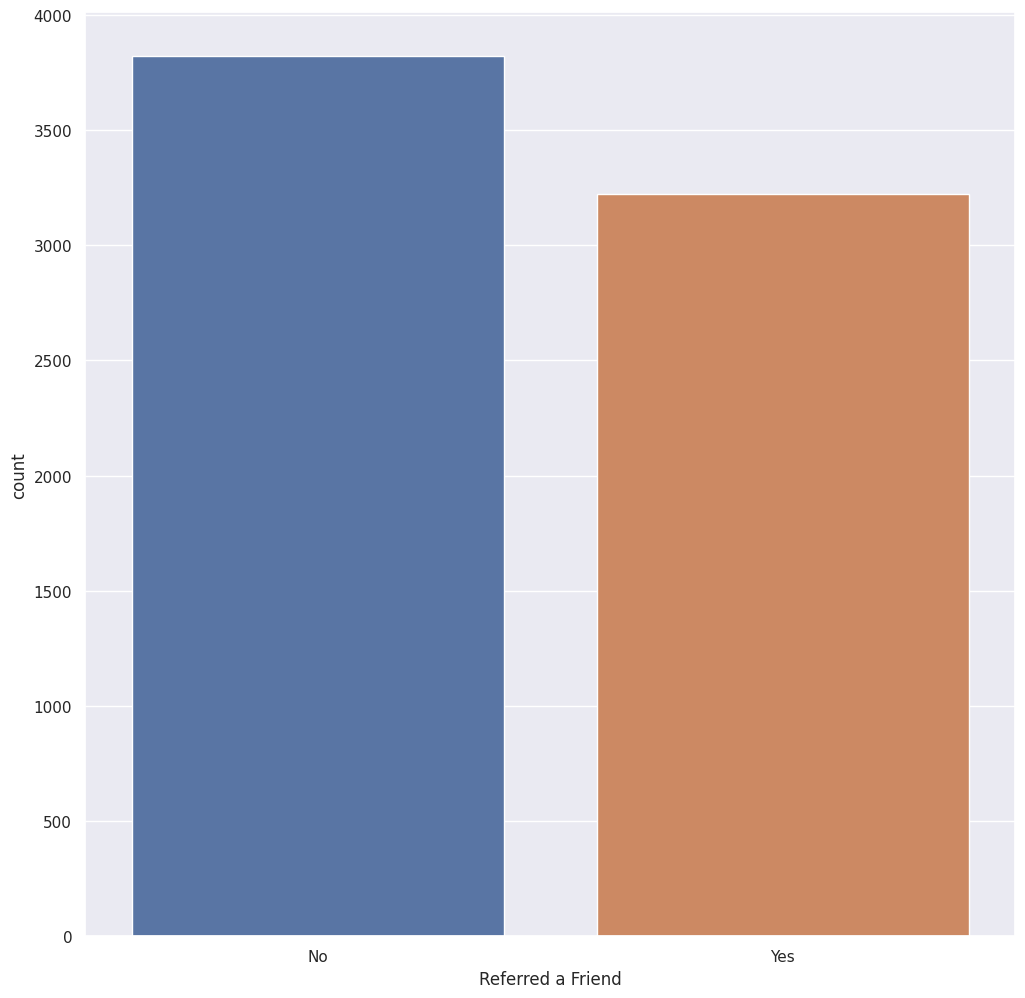

         Offer  Ratio
Offer                
Offer B    824 11.700
Offer E    805 11.430
Offer D    602  8.547
Offer A    520  7.383
Offer C    415  5.892


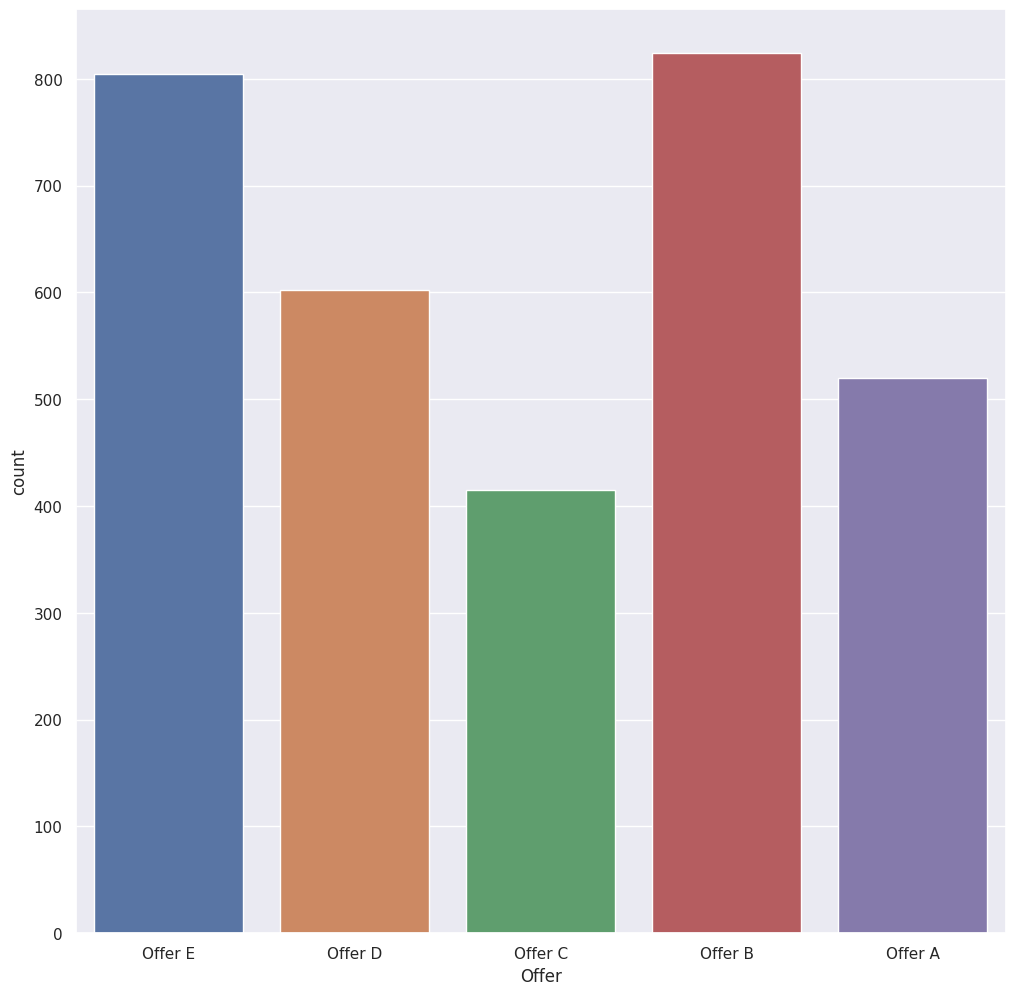

               Phone Service  Ratio
Phone Service                      
Yes                     6361 90.317
No                       682  9.683


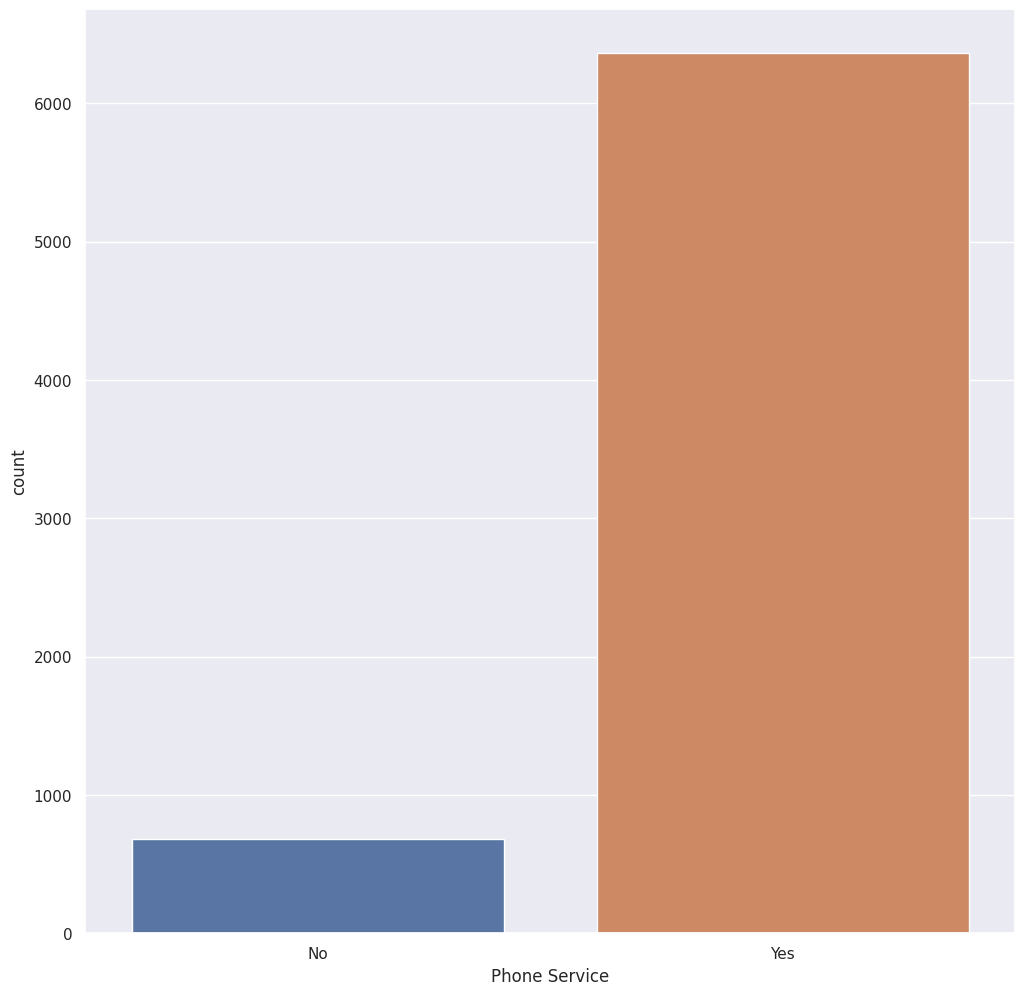

                Multiple Lines  Ratio
Multiple Lines                       
No                        4072 57.816
Yes                       2971 42.184


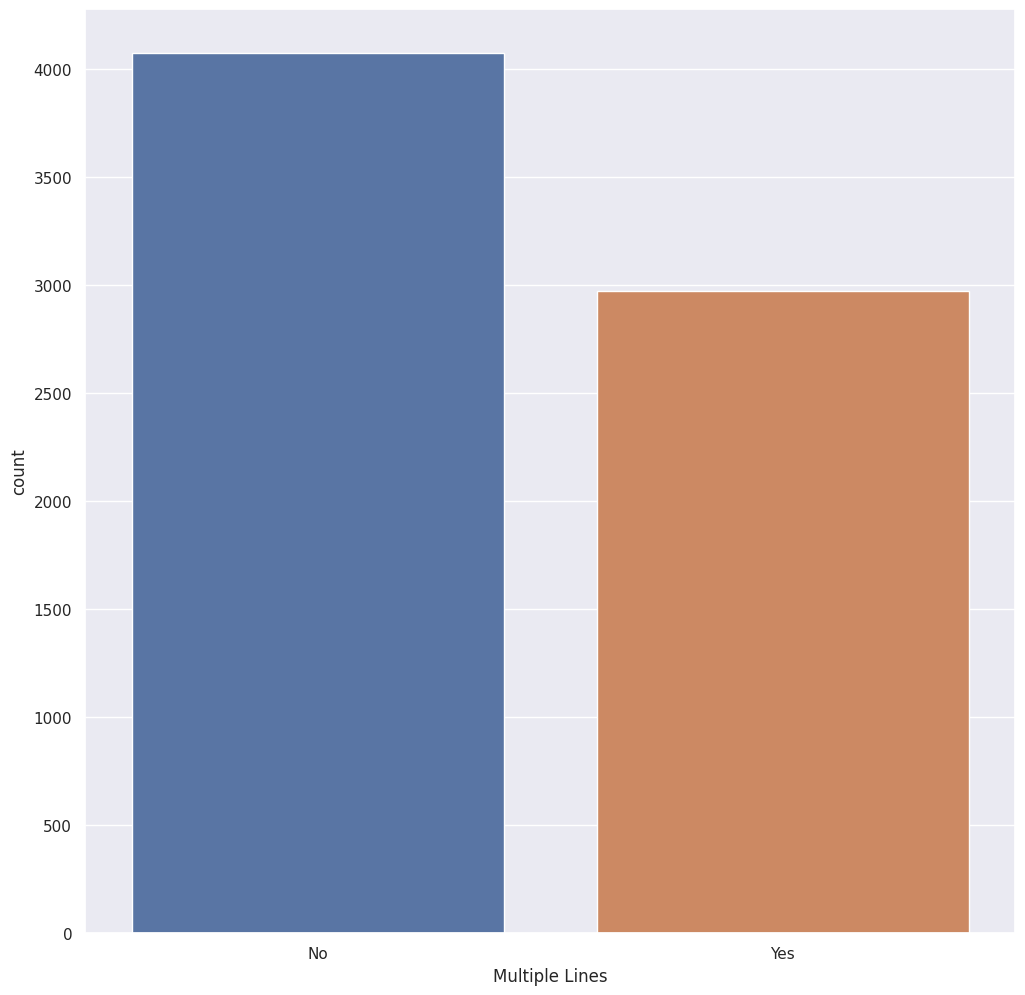

                  Internet Service  Ratio
Internet Service                         
Yes                           5517 78.333
No                            1526 21.667


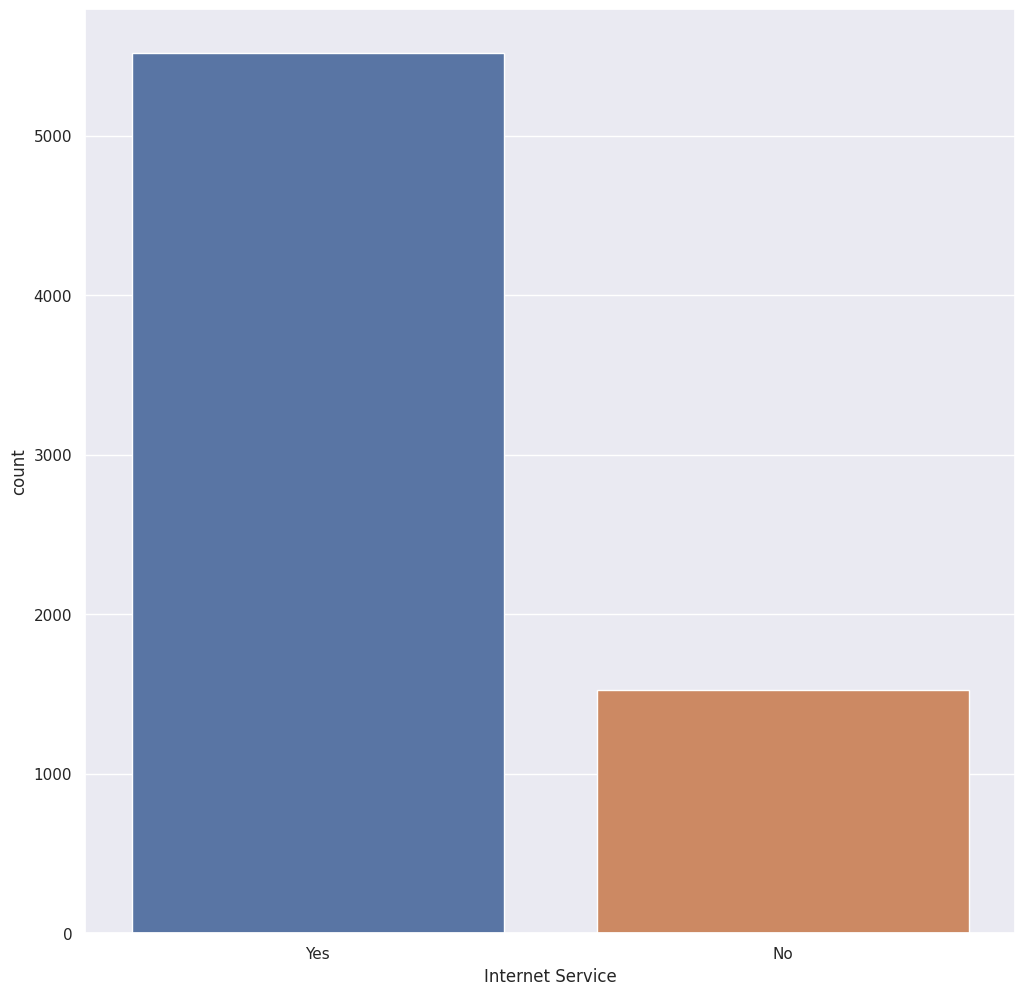

               Internet Type  Ratio
Internet Type                      
Fiber Optic             3035 43.092
DSL                     1652 23.456
Cable                    830 11.785


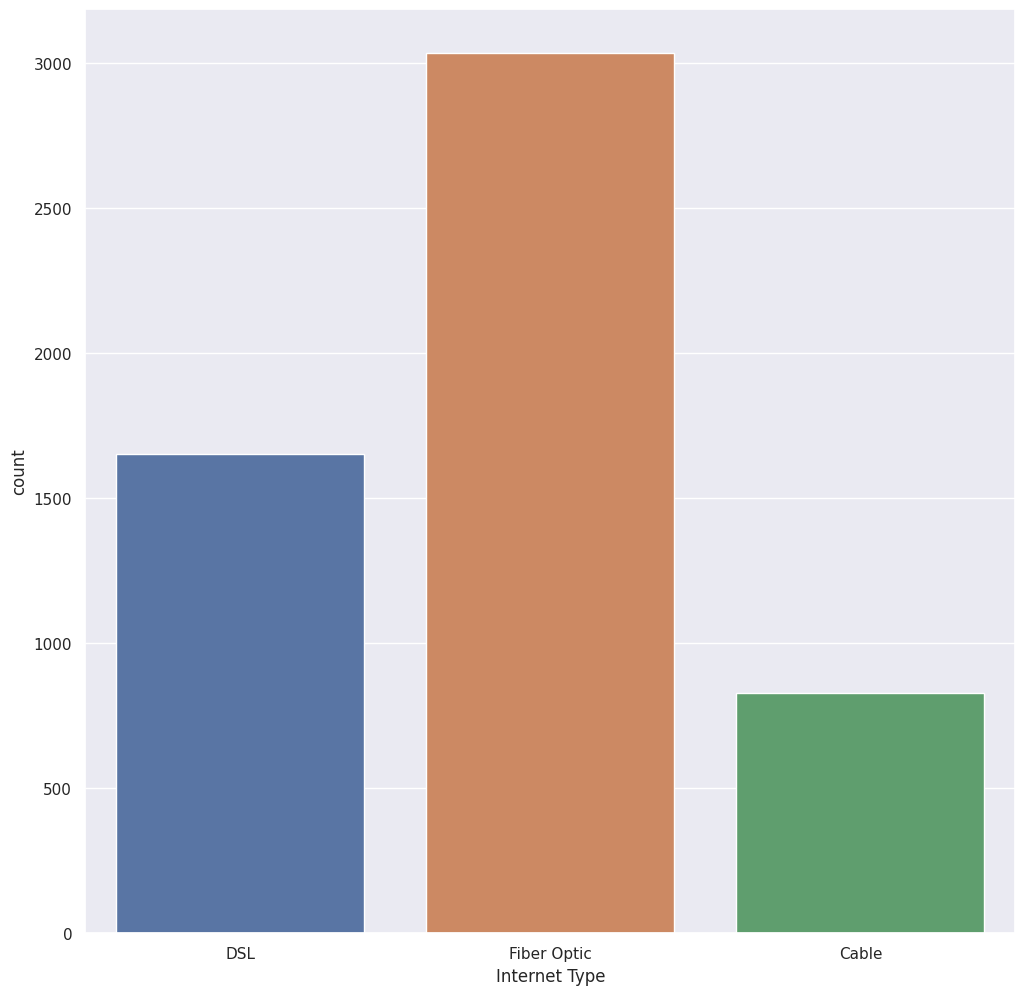

                 Online Security  Ratio
Online Security                        
No                          5024 71.333
Yes                         2019 28.667


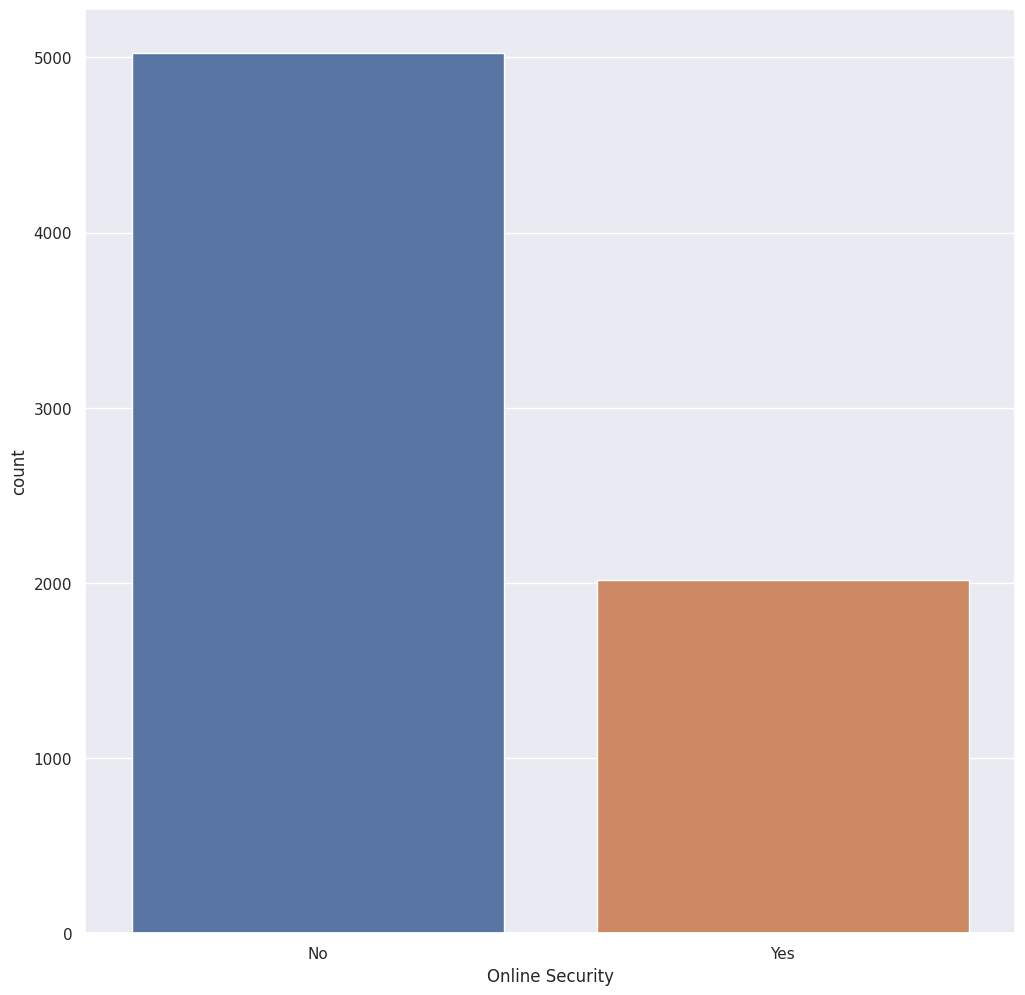

               Online Backup  Ratio
Online Backup                      
No                      4614 65.512
Yes                     2429 34.488


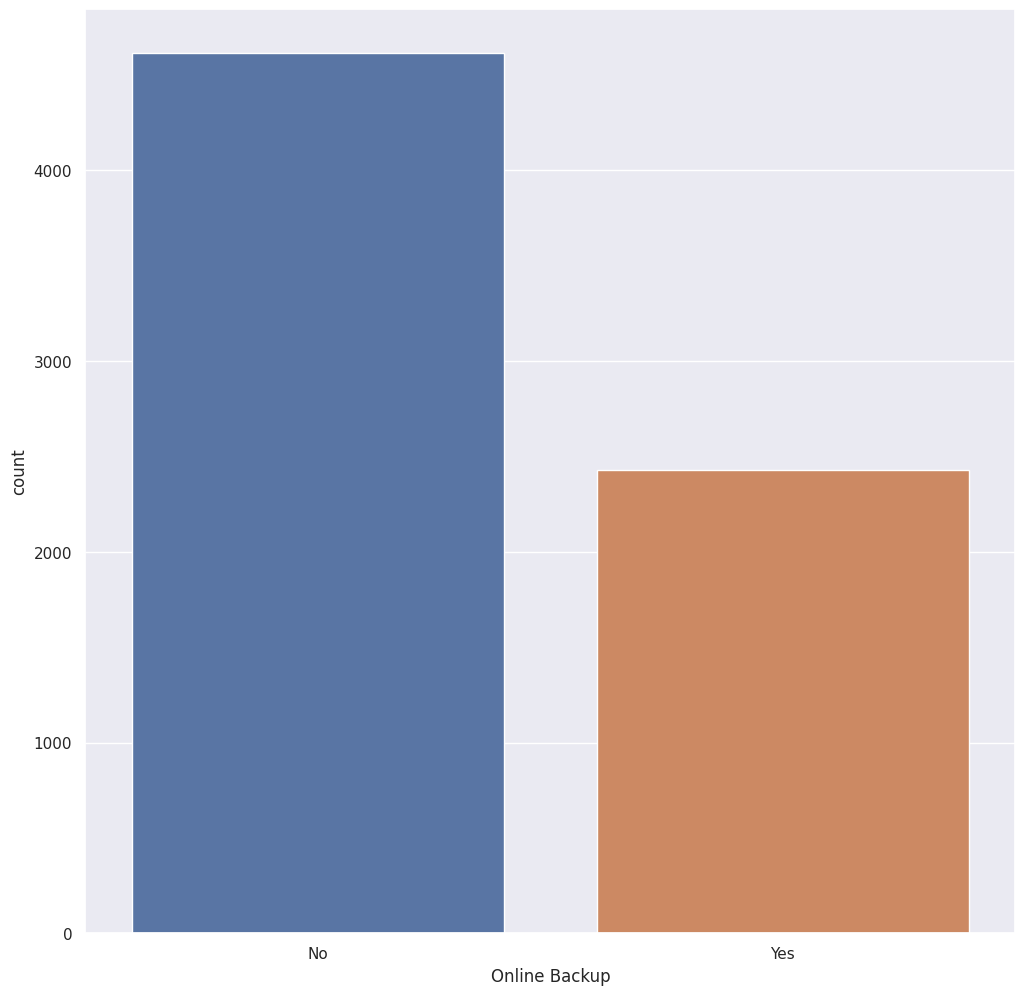

                        Device Protection Plan  Ratio
Device Protection Plan                               
No                                        4621 65.611
Yes                                       2422 34.389


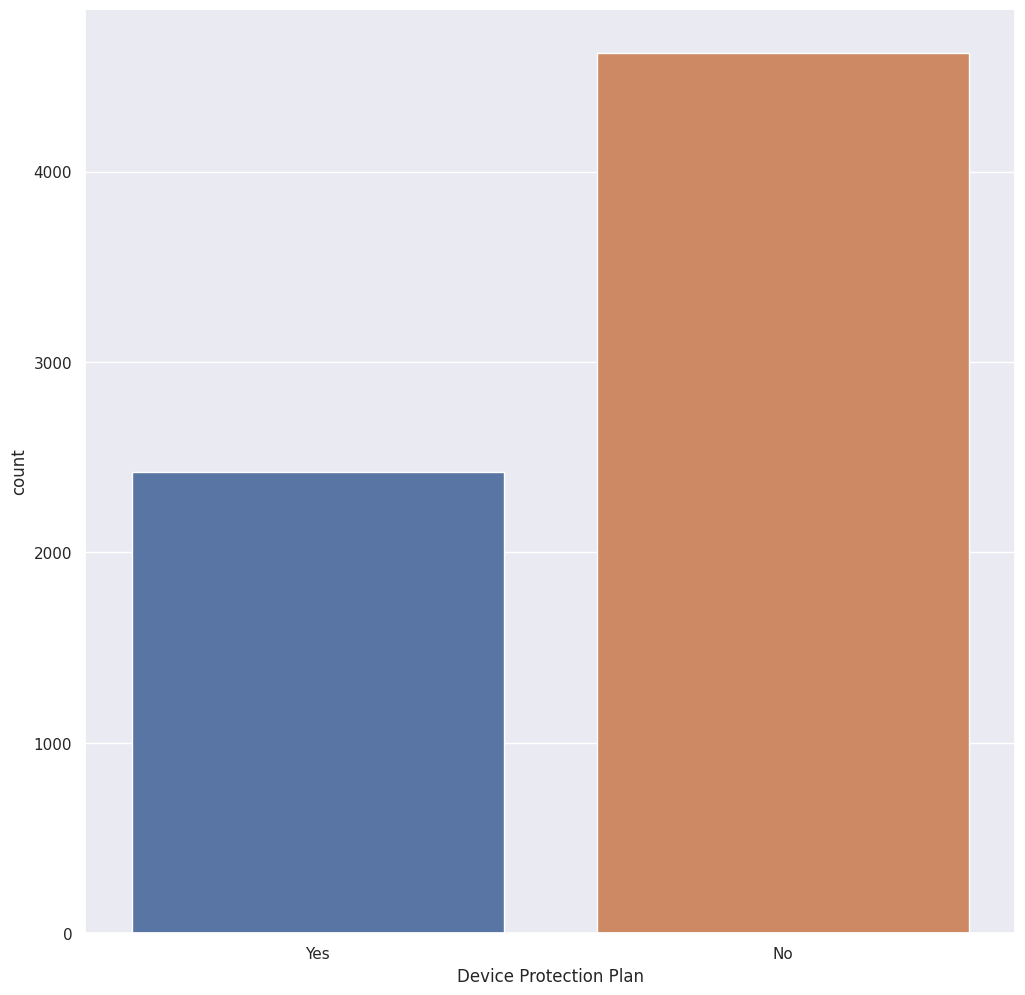

                      Premium Tech Support  Ratio
Premium Tech Support                             
No                                    4999 70.978
Yes                                   2044 29.022


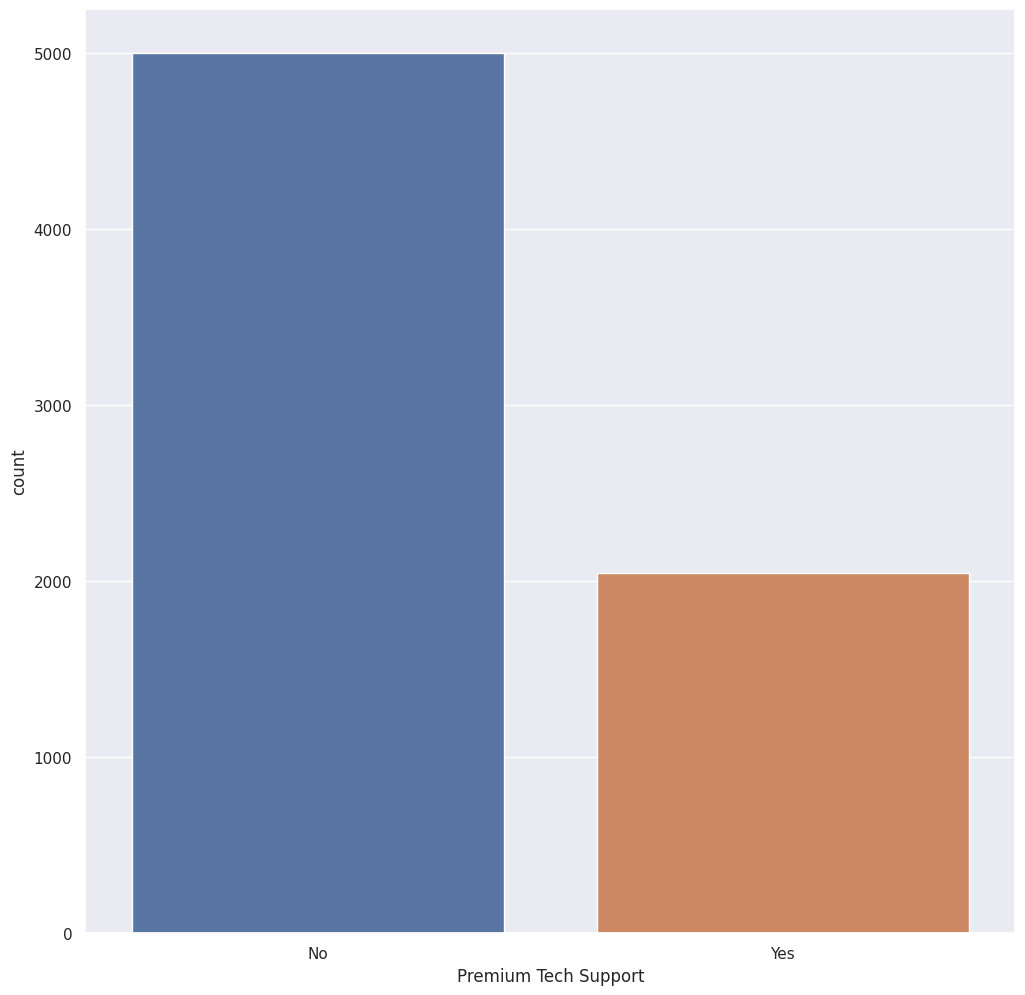

              Streaming TV  Ratio
Streaming TV                     
No                    4336 61.565
Yes                   2707 38.435


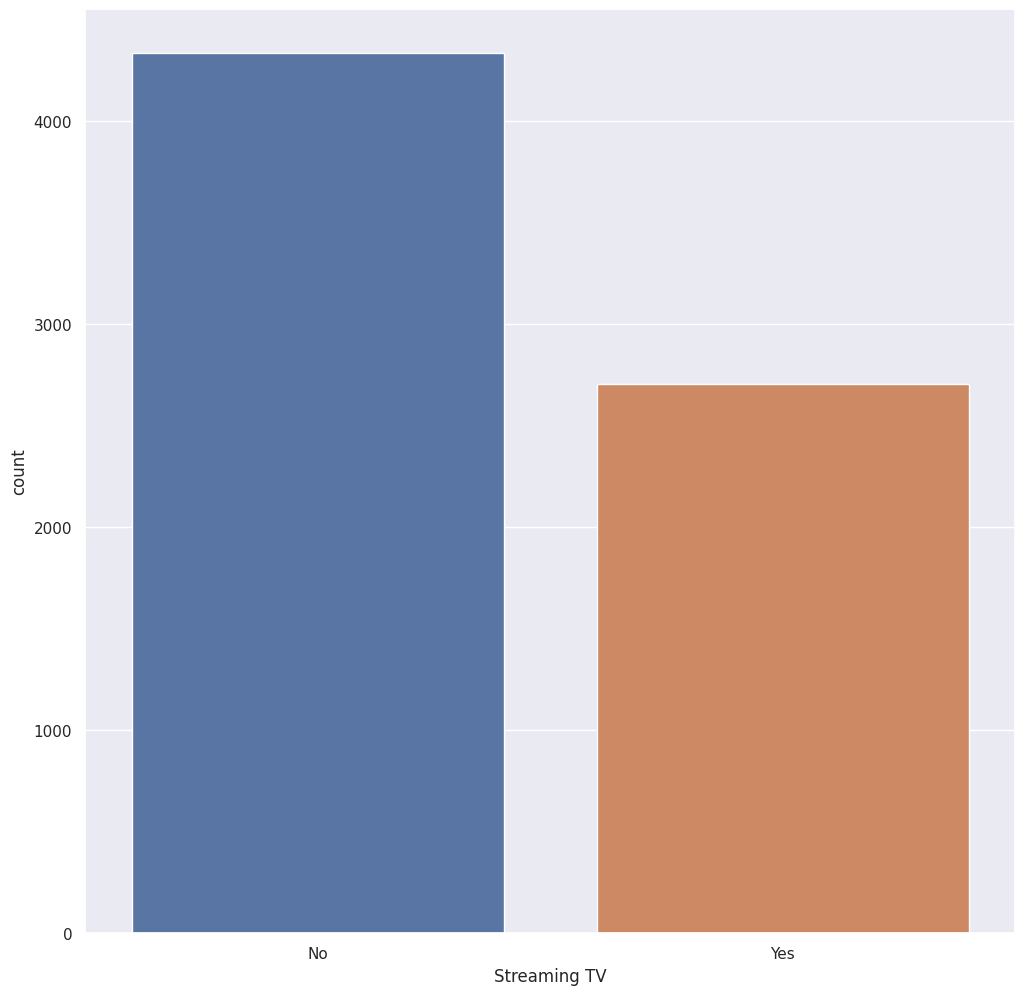

                  Streaming Movies  Ratio
Streaming Movies                         
No                            4311 61.210
Yes                           2732 38.790


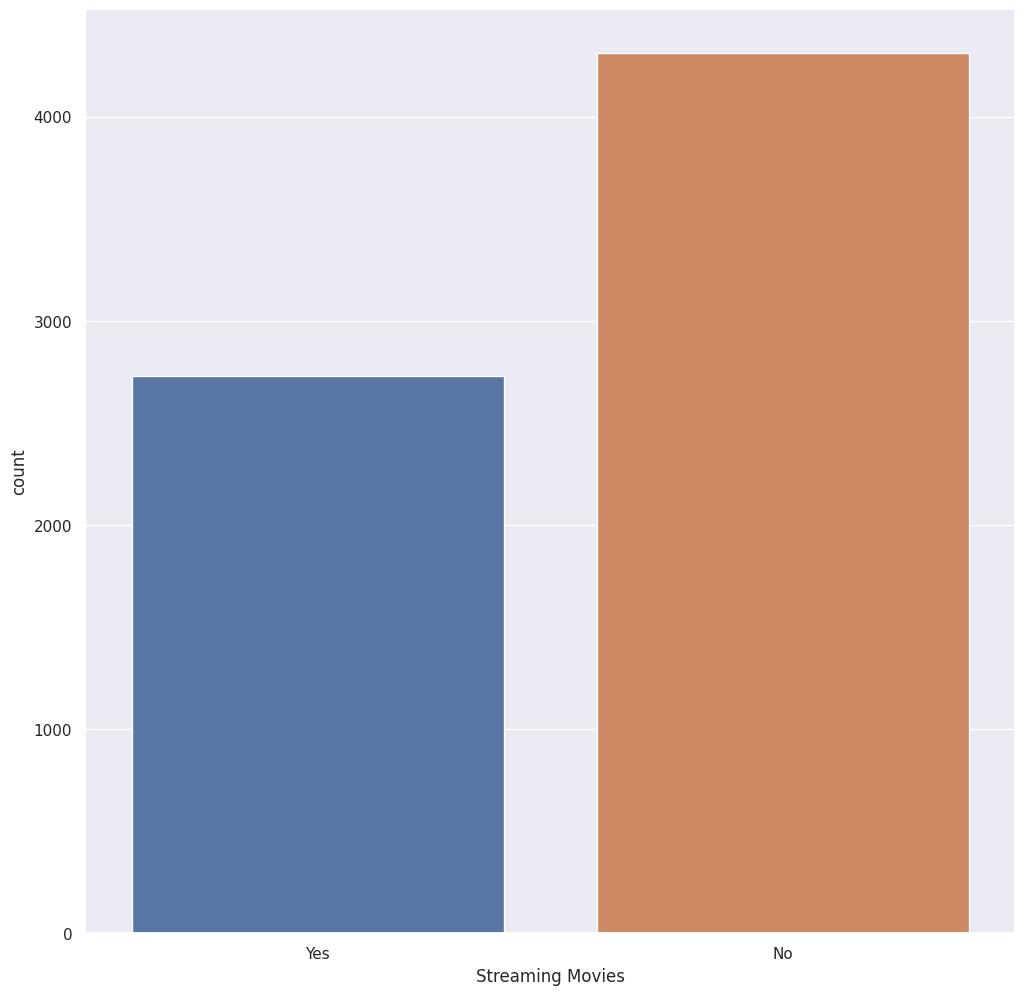

                 Streaming Music  Ratio
Streaming Music                        
No                          4555 64.674
Yes                         2488 35.326


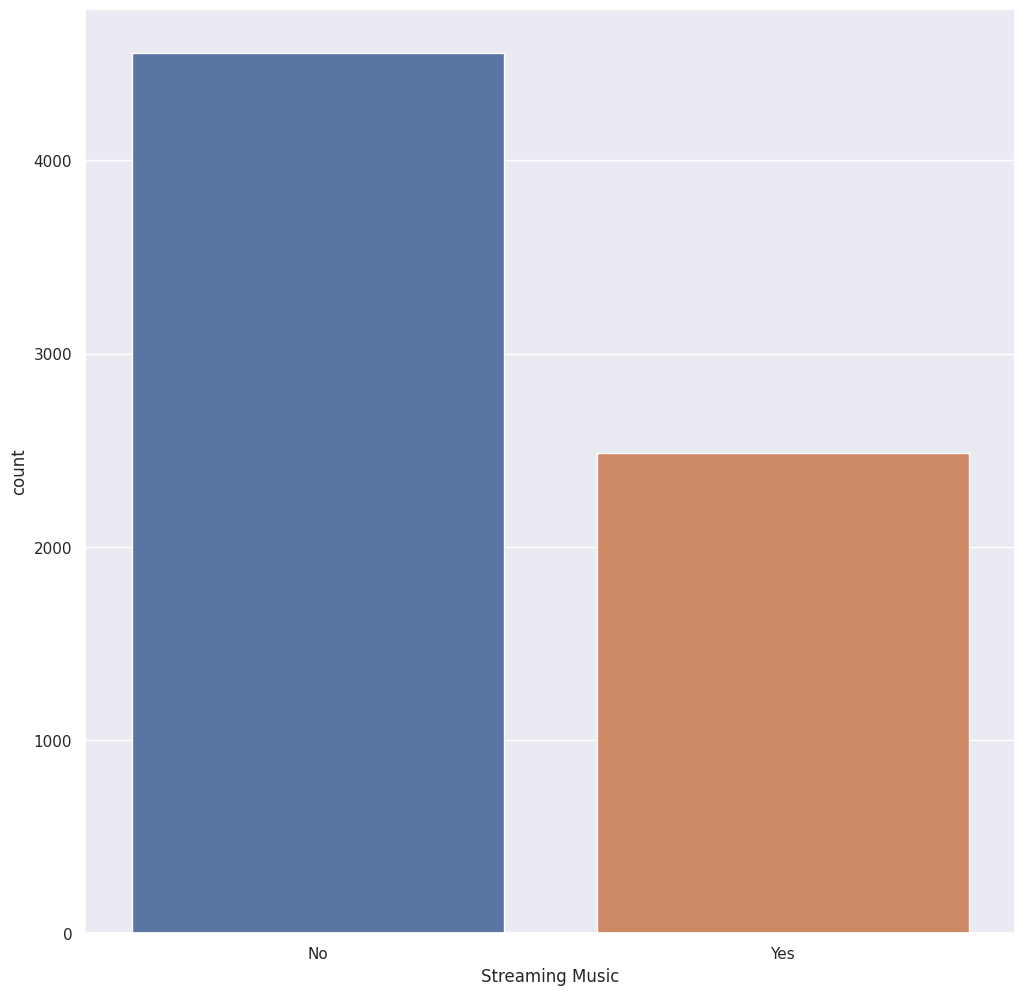

                Unlimited Data  Ratio
Unlimited Data                       
Yes                       4745 67.372
No                        2298 32.628


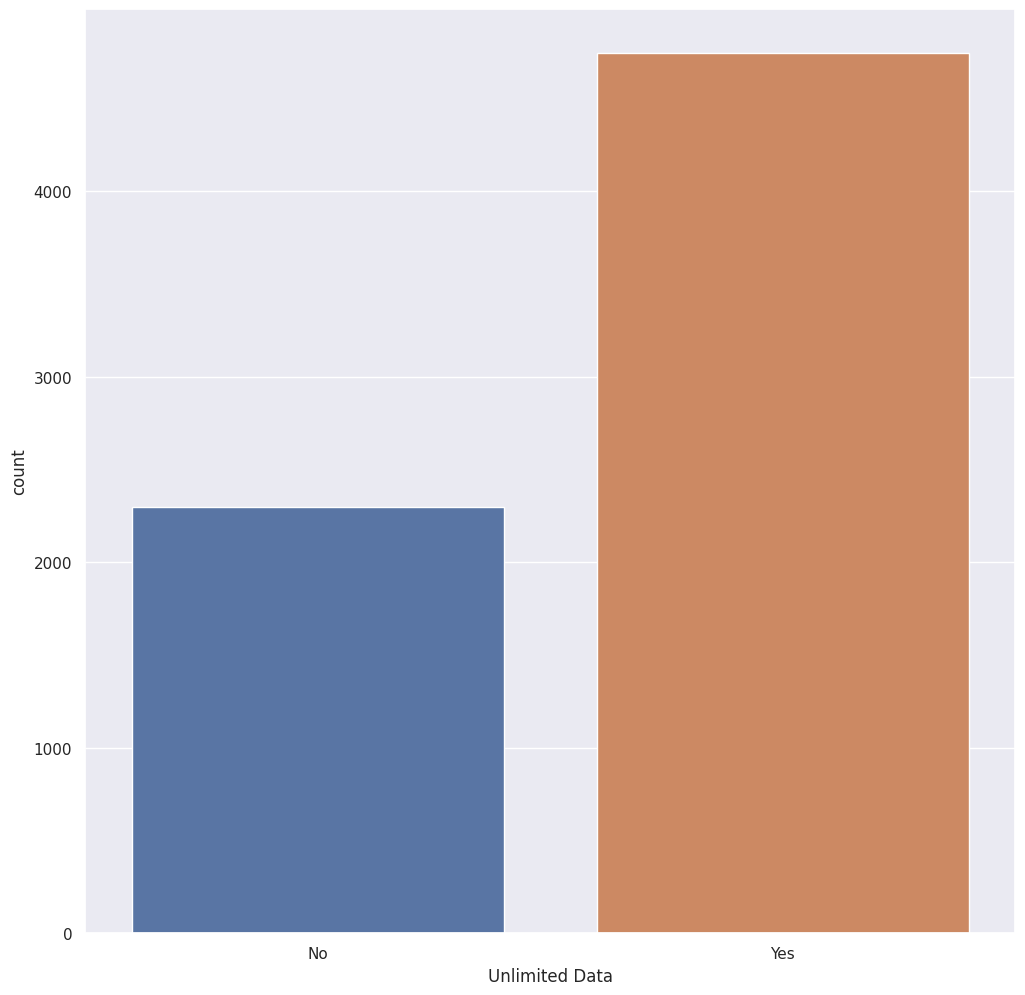

                Contract  Ratio
Contract                       
Month-to-Month      3610 51.257
Two Year            1883 26.736
One Year            1550 22.008


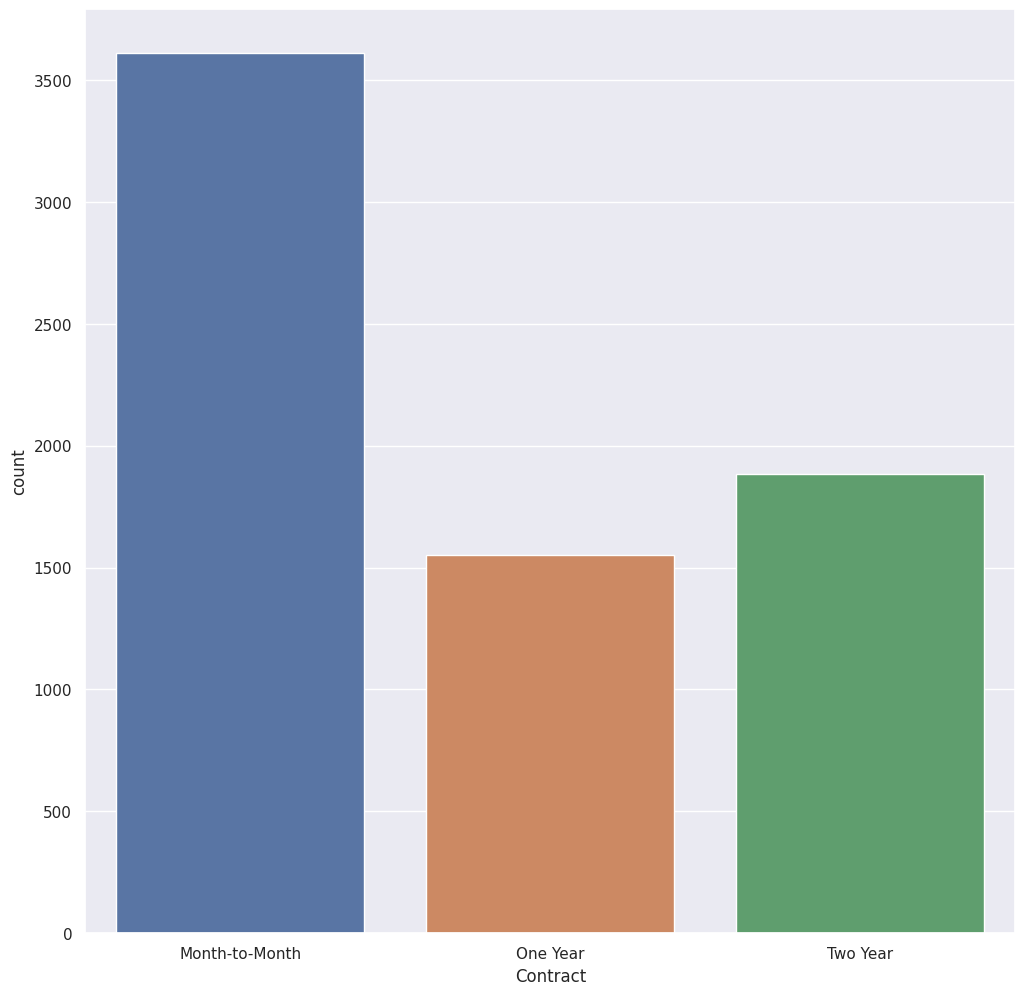

                   Paperless Billing  Ratio
Paperless Billing                          
Yes                             4171 59.222
No                              2872 40.778


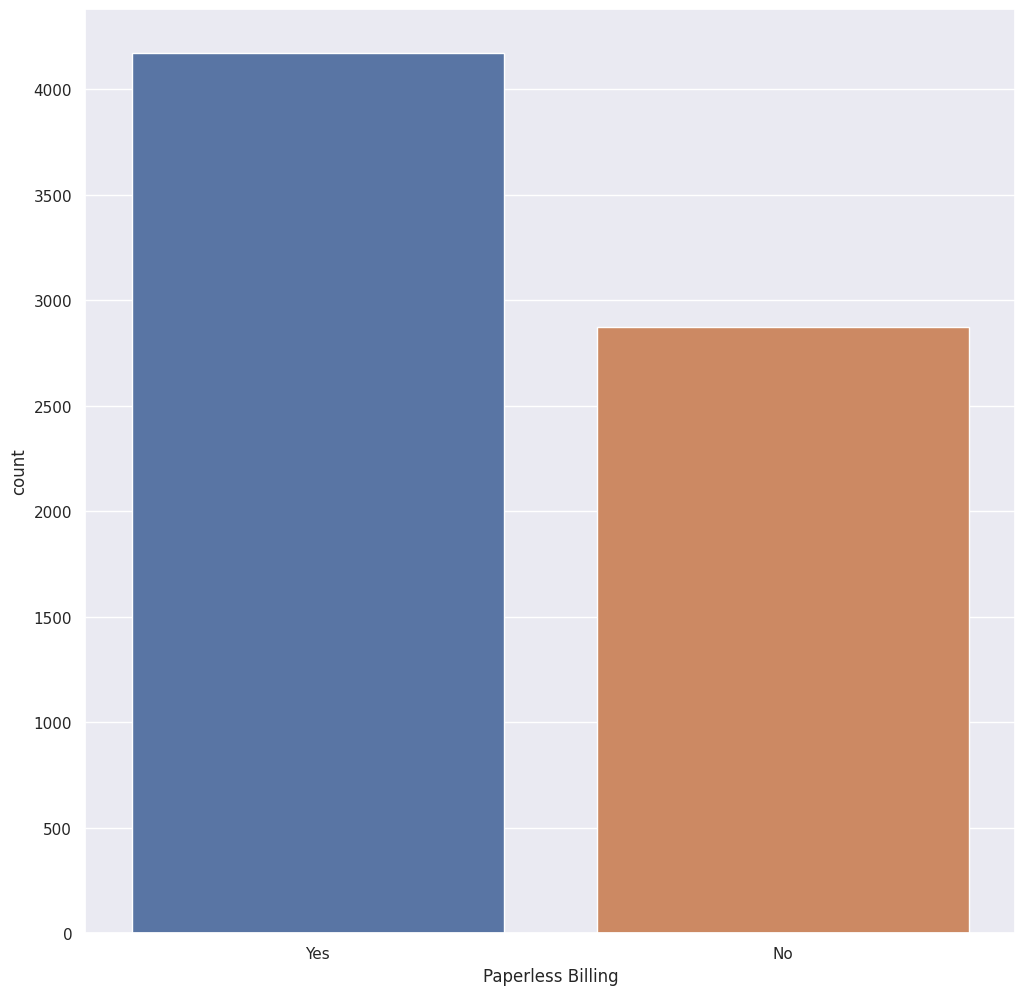

                 Payment Method  Ratio
Payment Method                        
Bank Withdrawal            3909 55.502
Credit Card                2749 39.032
Mailed Check                385  5.466


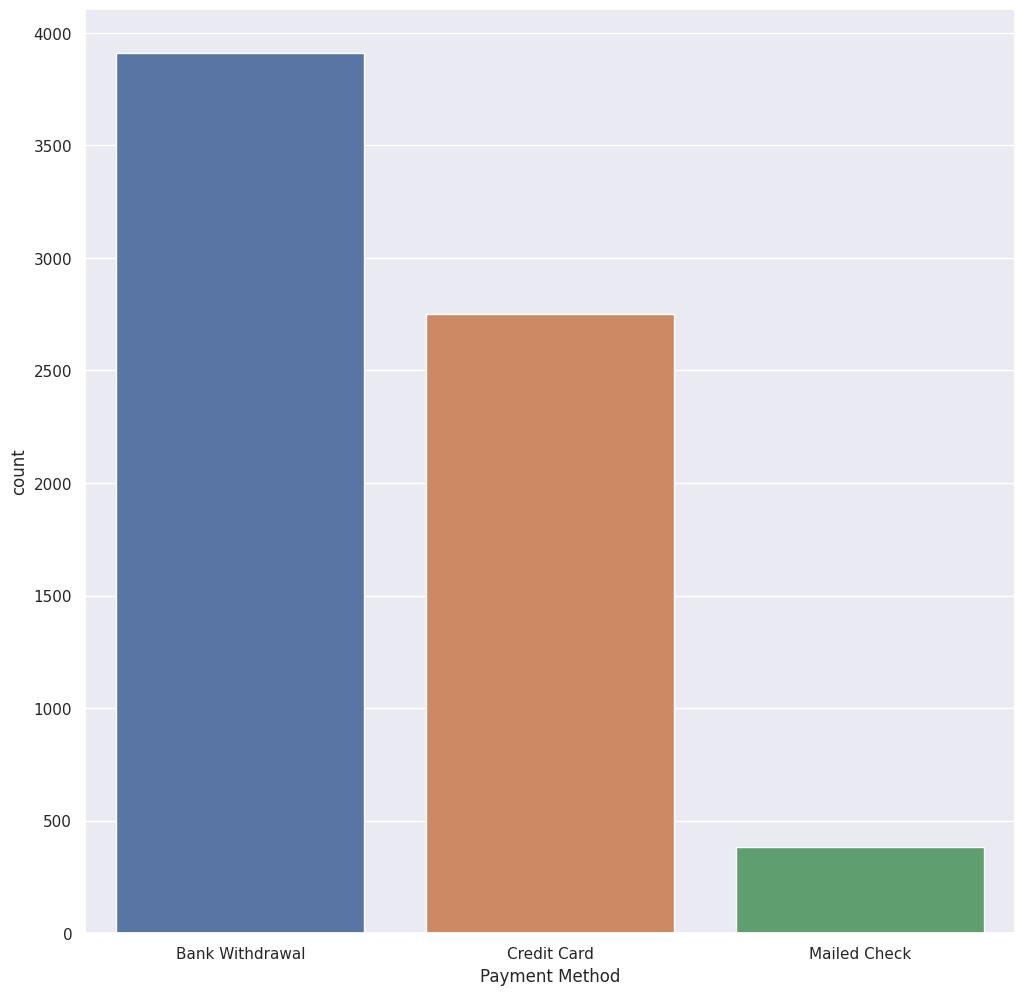

                 Customer Status  Ratio
Customer Status                        
Stayed                      4720 67.017
Churned                     1869 26.537
Joined                       454  6.446


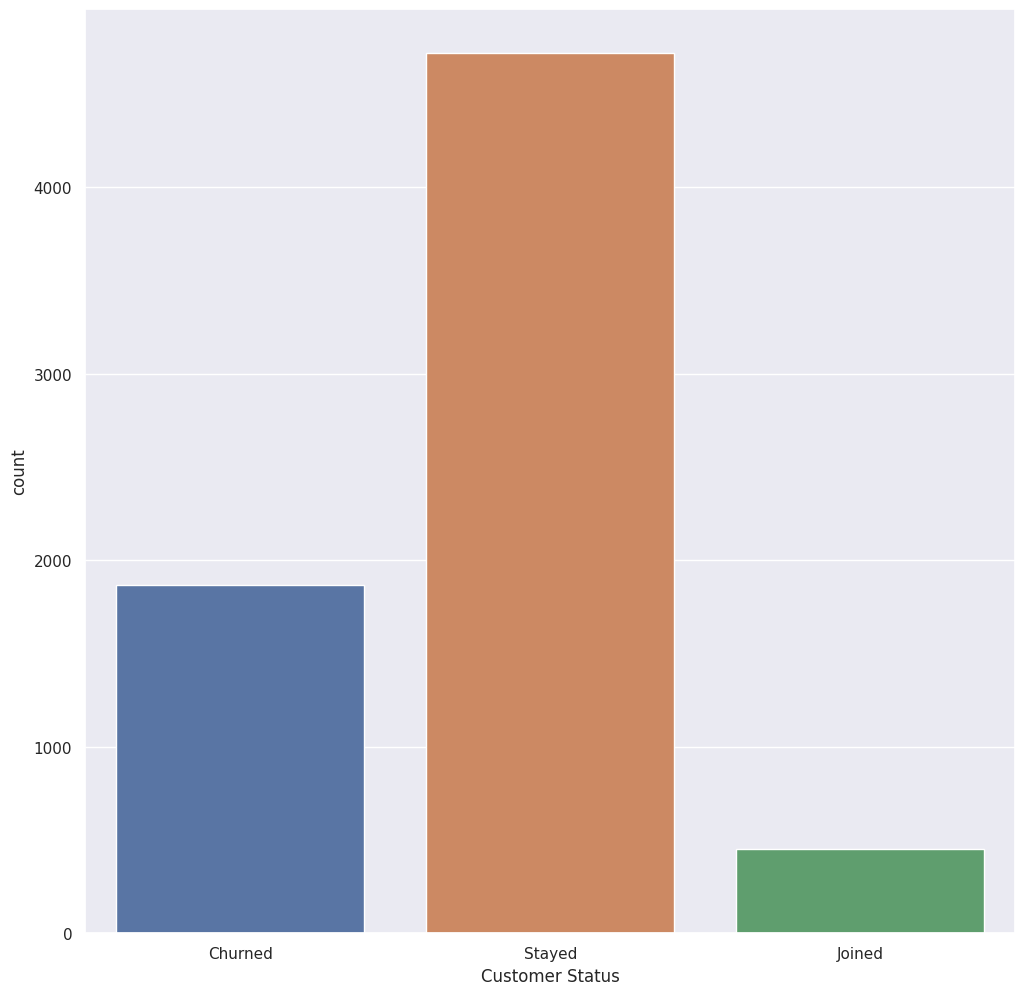

             Churn Label  Ratio
Churn Label                    
No                  5174 73.463
Yes                 1869 26.537


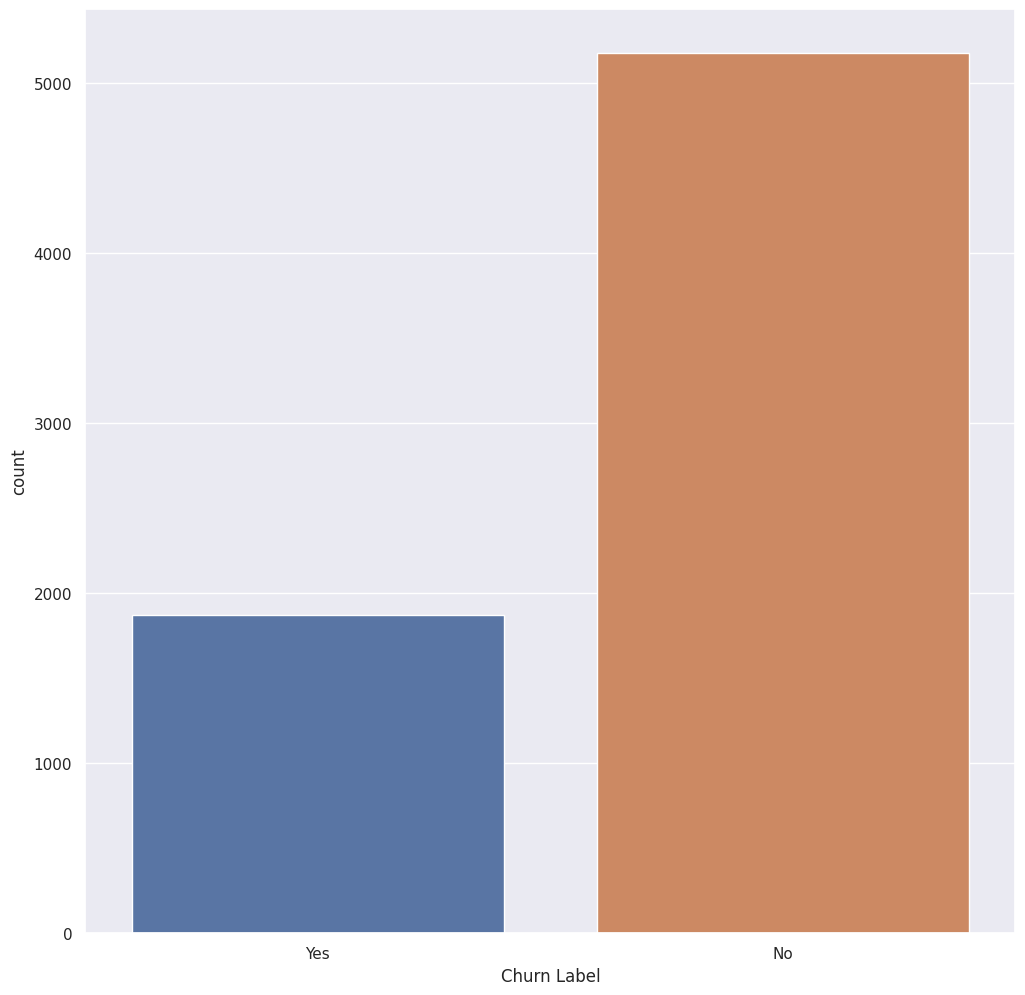

                 Churn Category  Ratio
Churn Category                        
Competitor                  841 11.941
Attitude                    314  4.458
Dissatisfaction             303  4.302
Price                       211  2.996
Other                       200  2.840


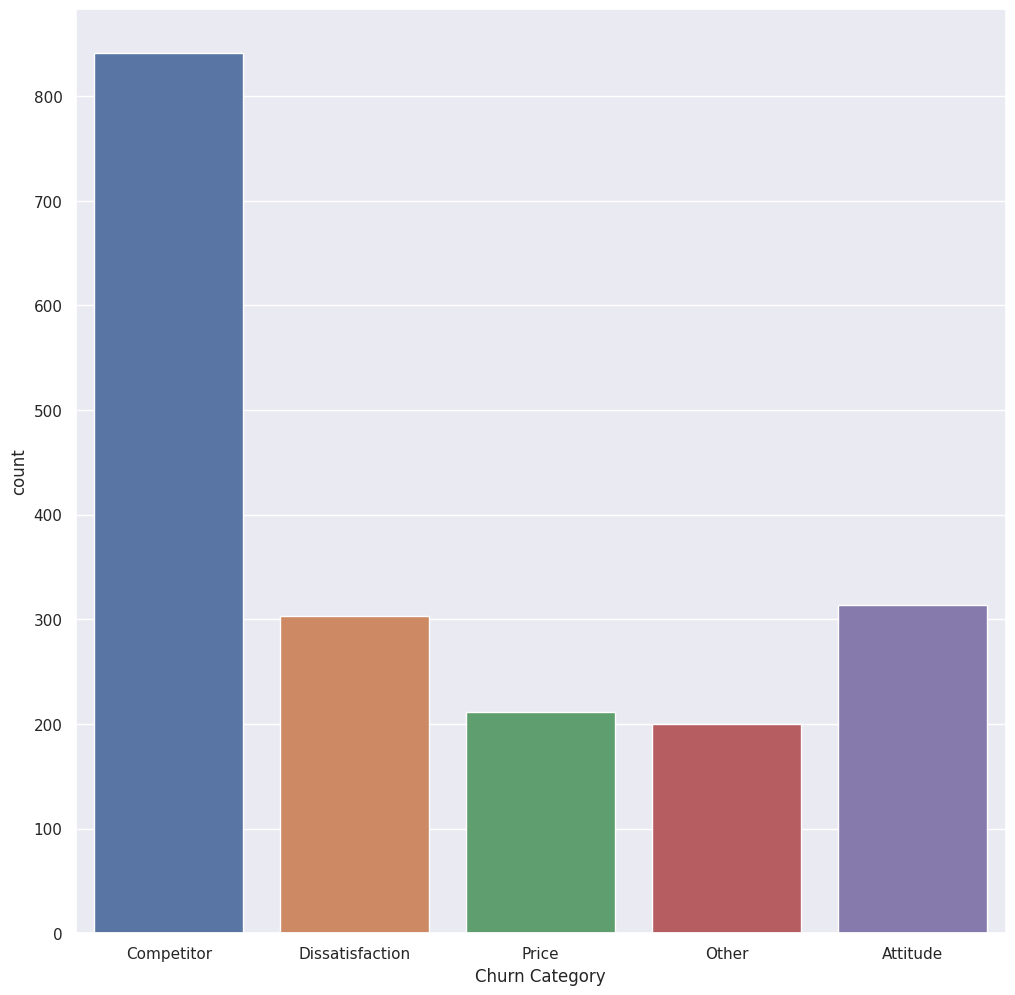

                                           Churn Reason  Ratio
Churn Reason                                                  
Competitor had better devices                       313  4.444
Competitor made better offer                        311  4.416
Attitude of support person                          220  3.124
Don't know                                          130  1.846
Competitor offered more data                        117  1.661
Competitor offered higher download speeds           100  1.420
Attitude of service provider                         94  1.335
Price too high                                       78  1.107
Product dissatisfaction                              77  1.093
Network reliability                                  72  1.022
Long distance charges                                64  0.909
Service dissatisfaction                              63  0.895
Moved                                                46  0.653
Extra data charges                                   39

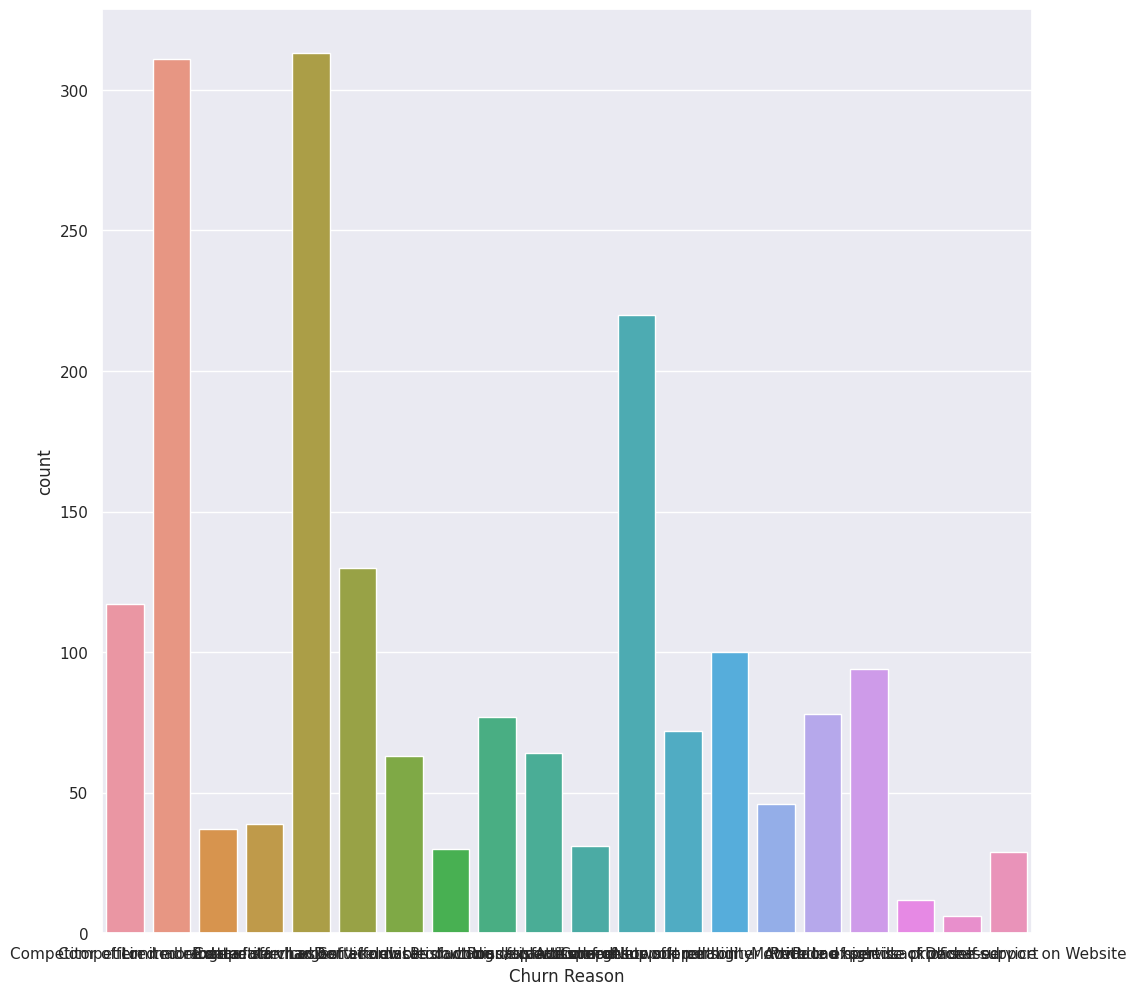

                    Satisfaction Score  Ratio
Satisfaction Score                           
3                                 2665 37.839
4                                 1789 25.401
5                                 1149 16.314
1                                  922 13.091
2                                  518  7.355


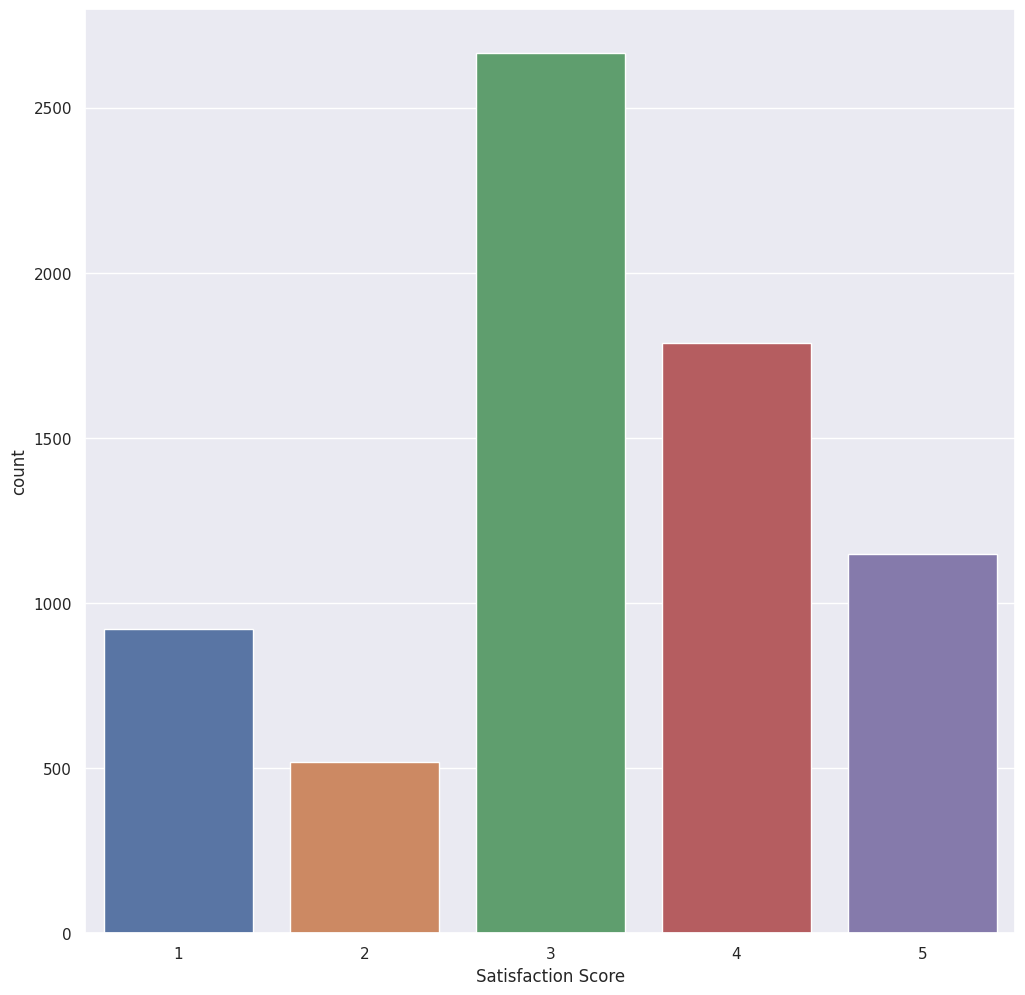

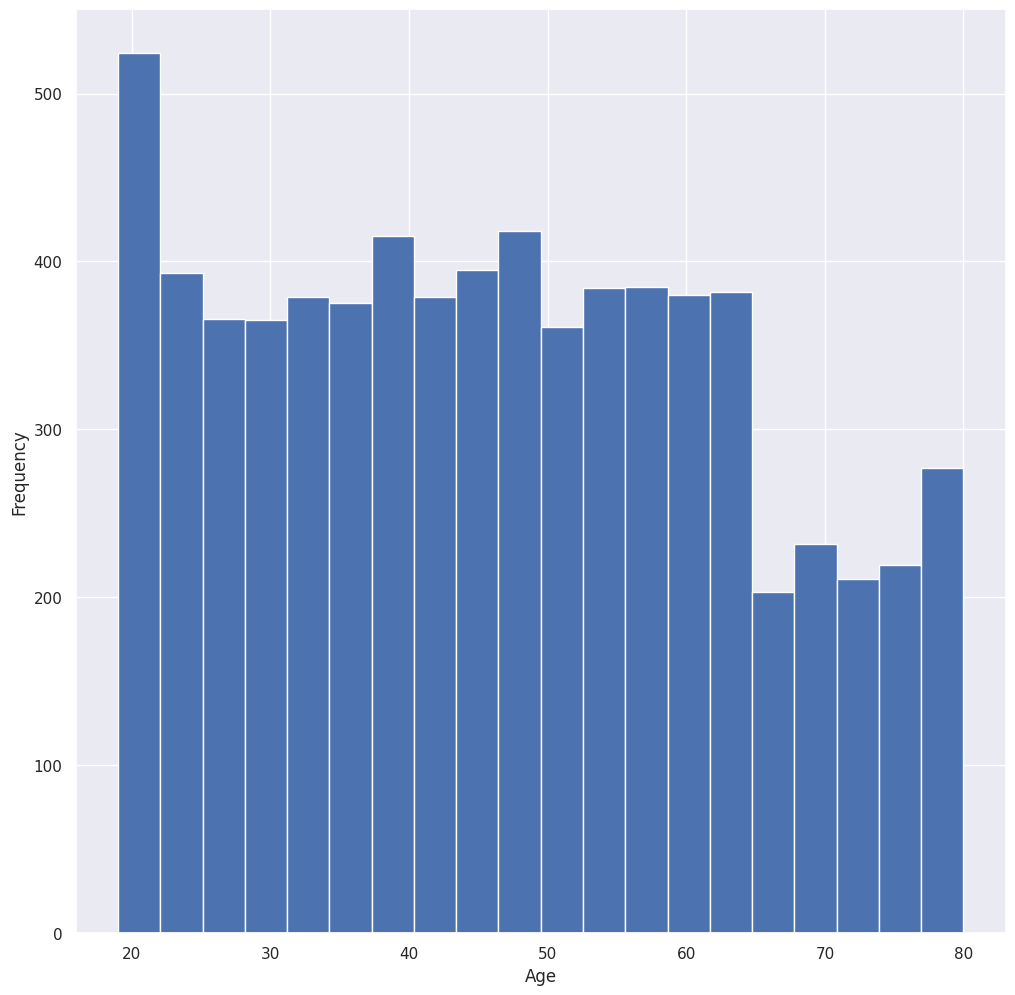

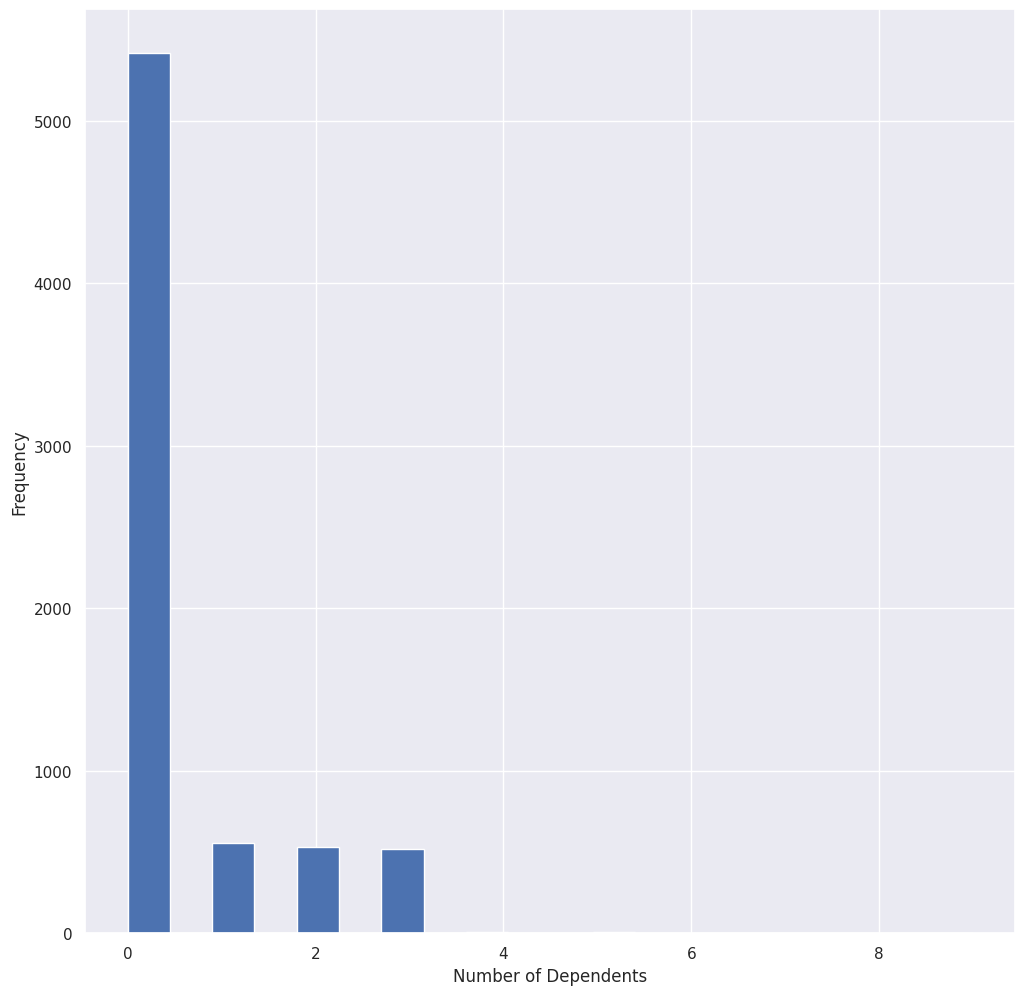

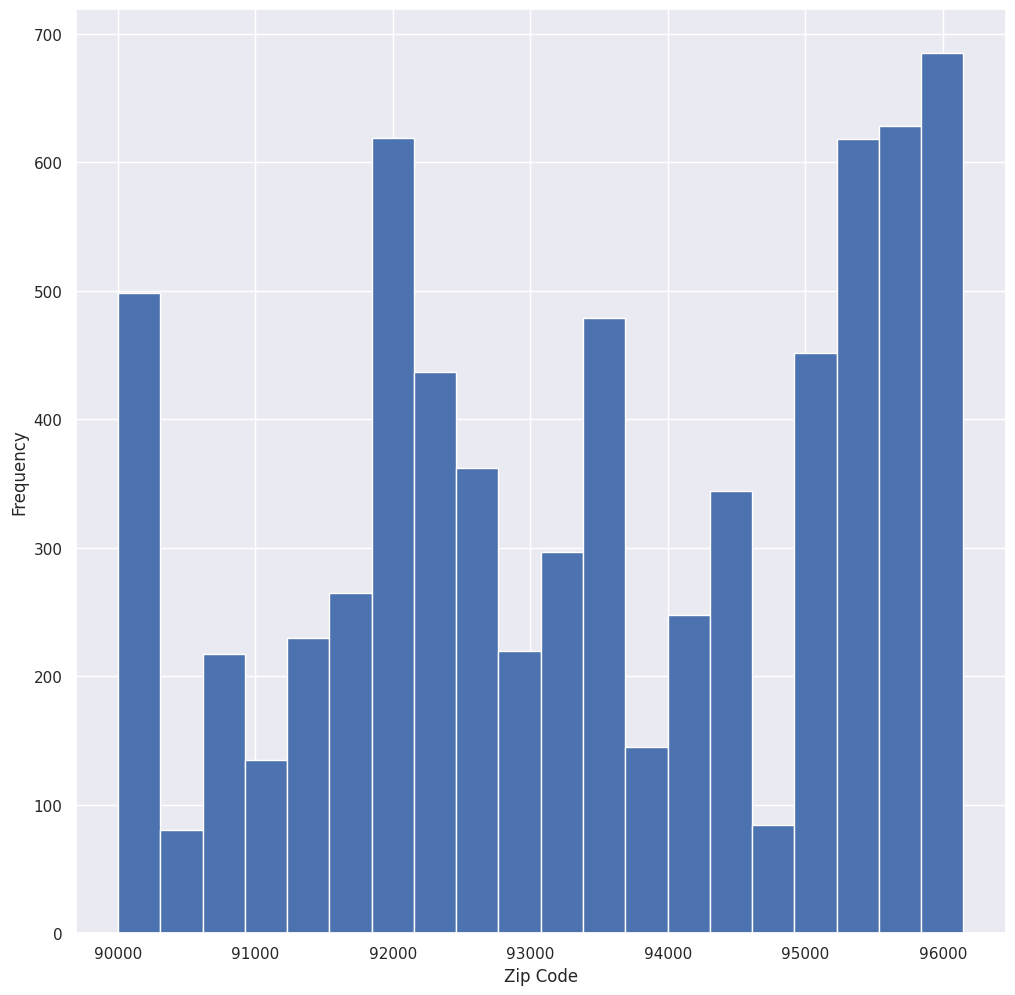

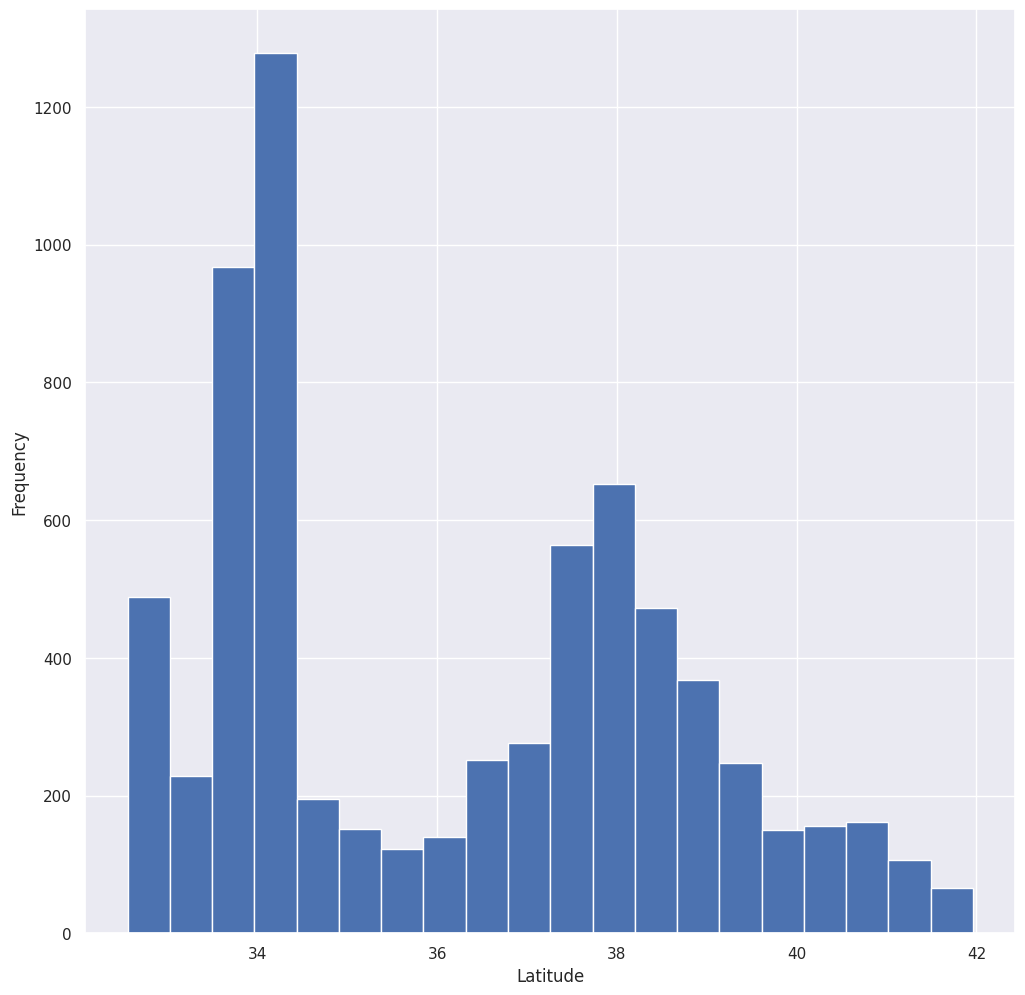

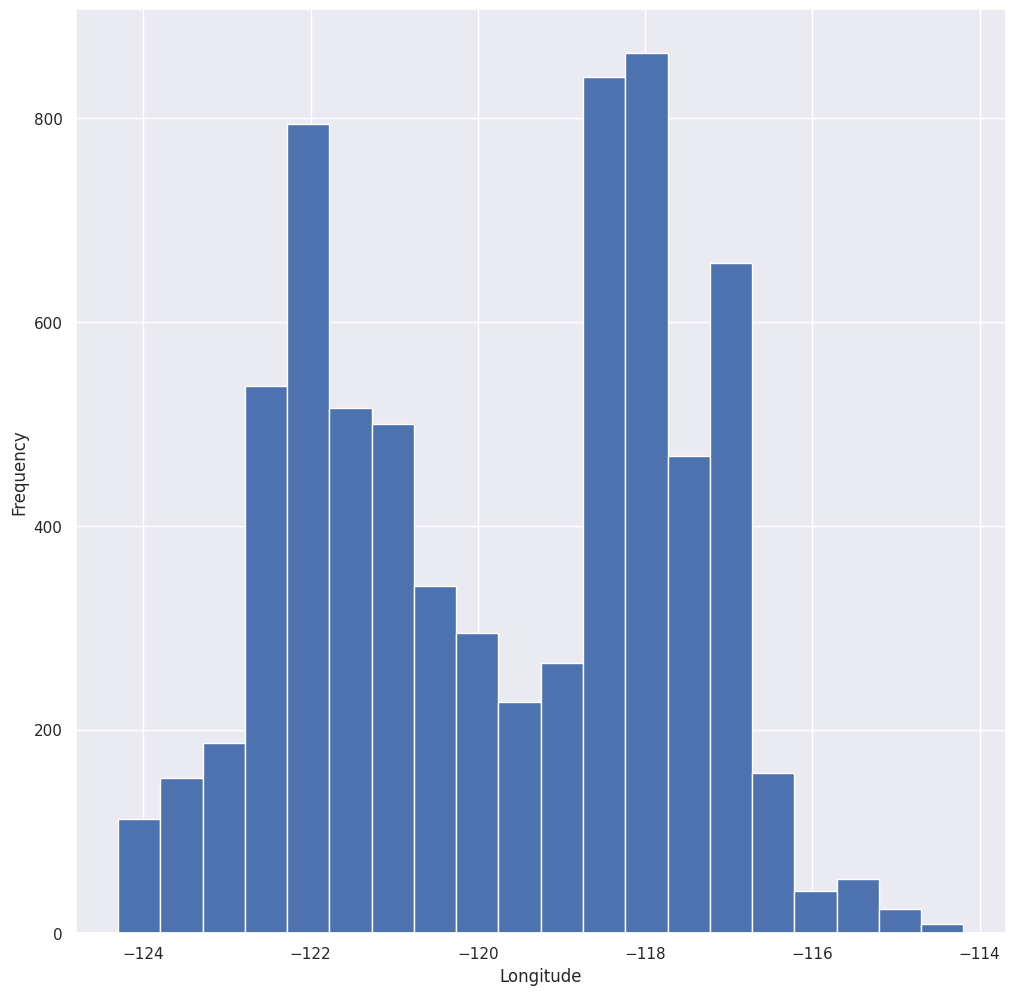

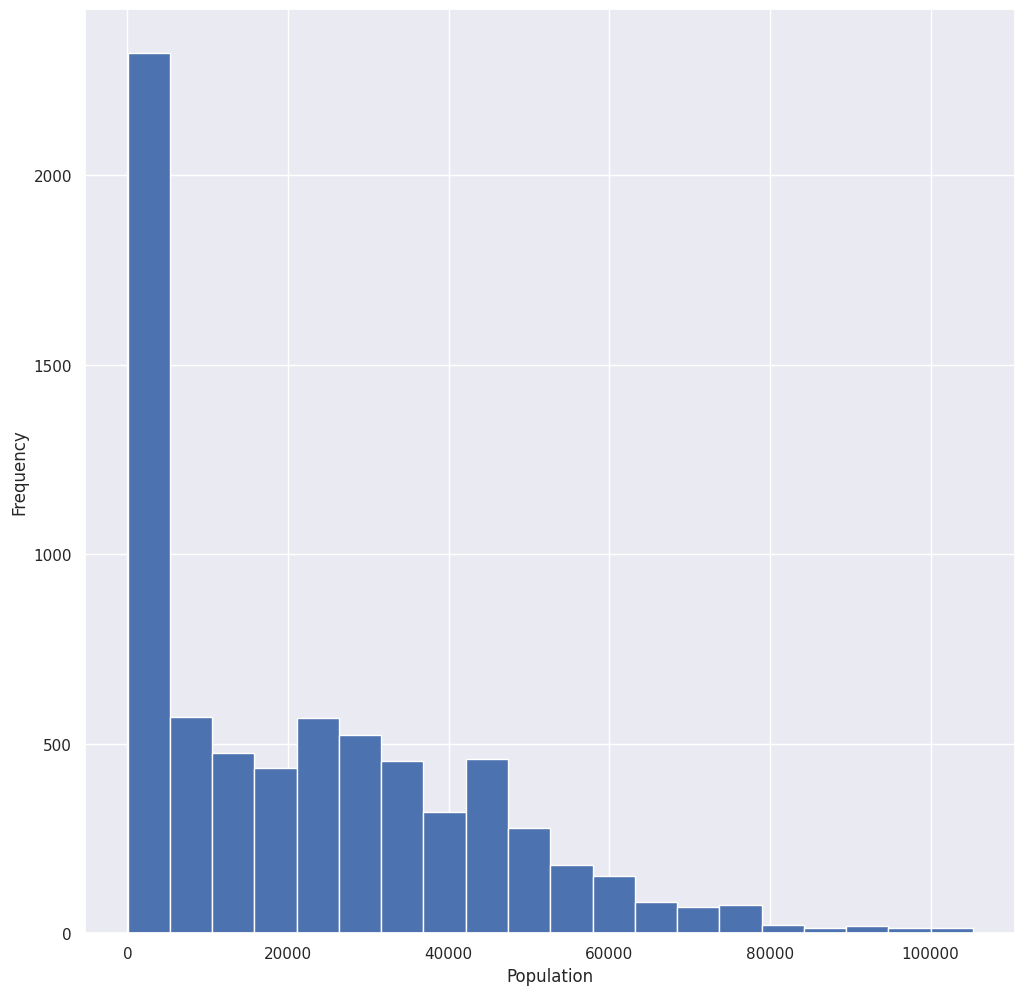

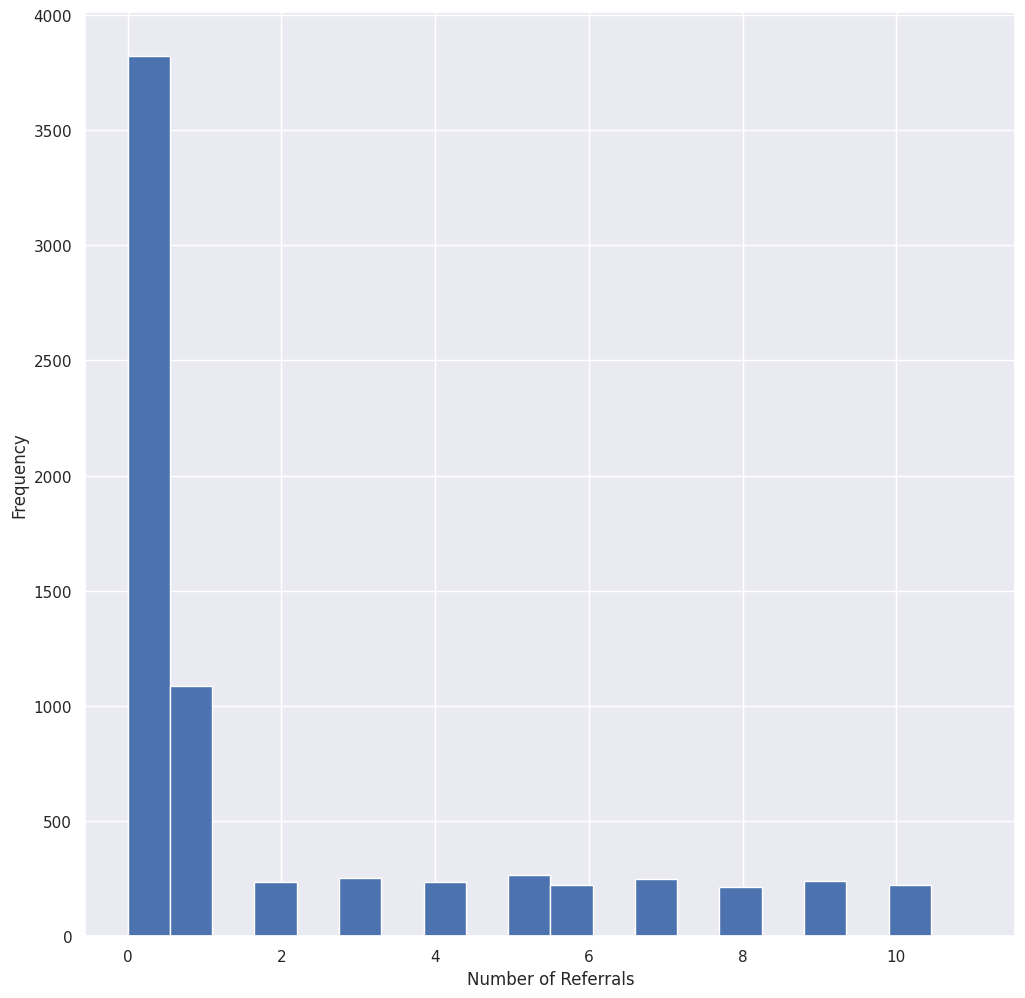

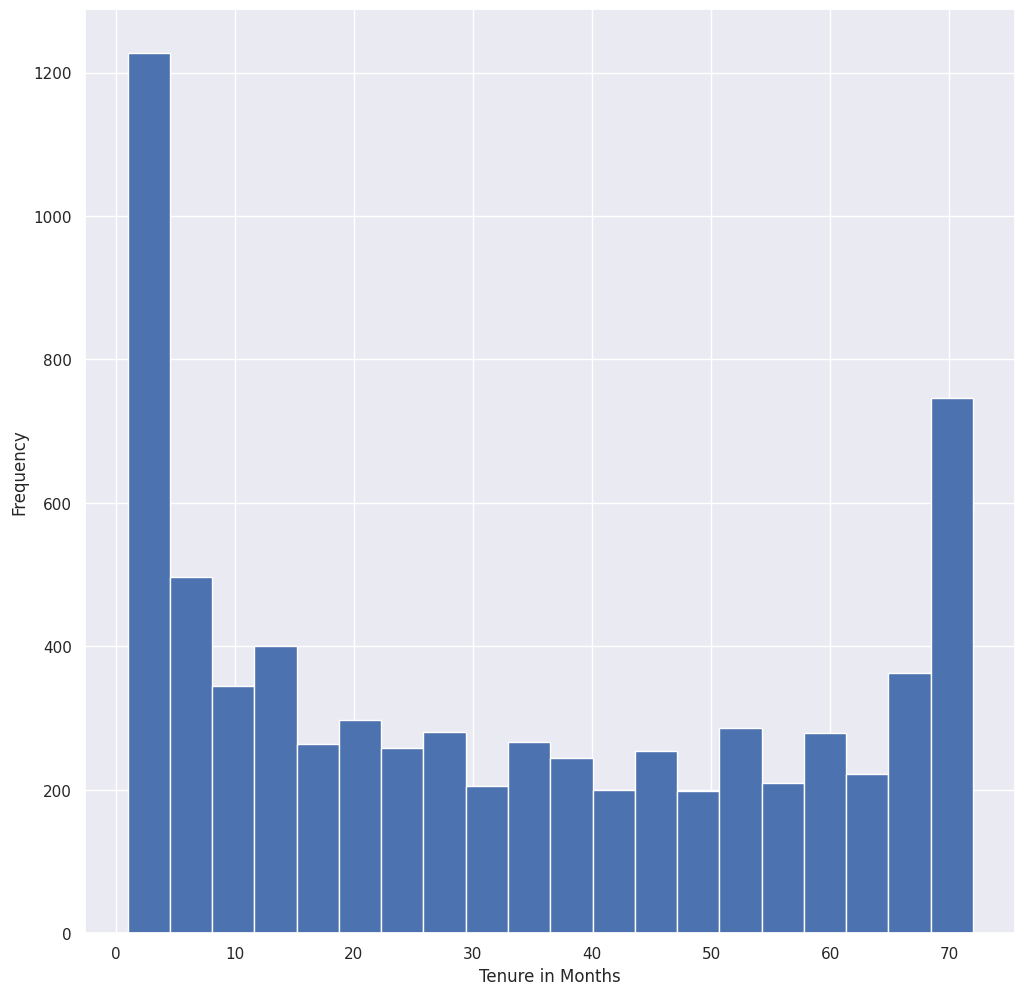

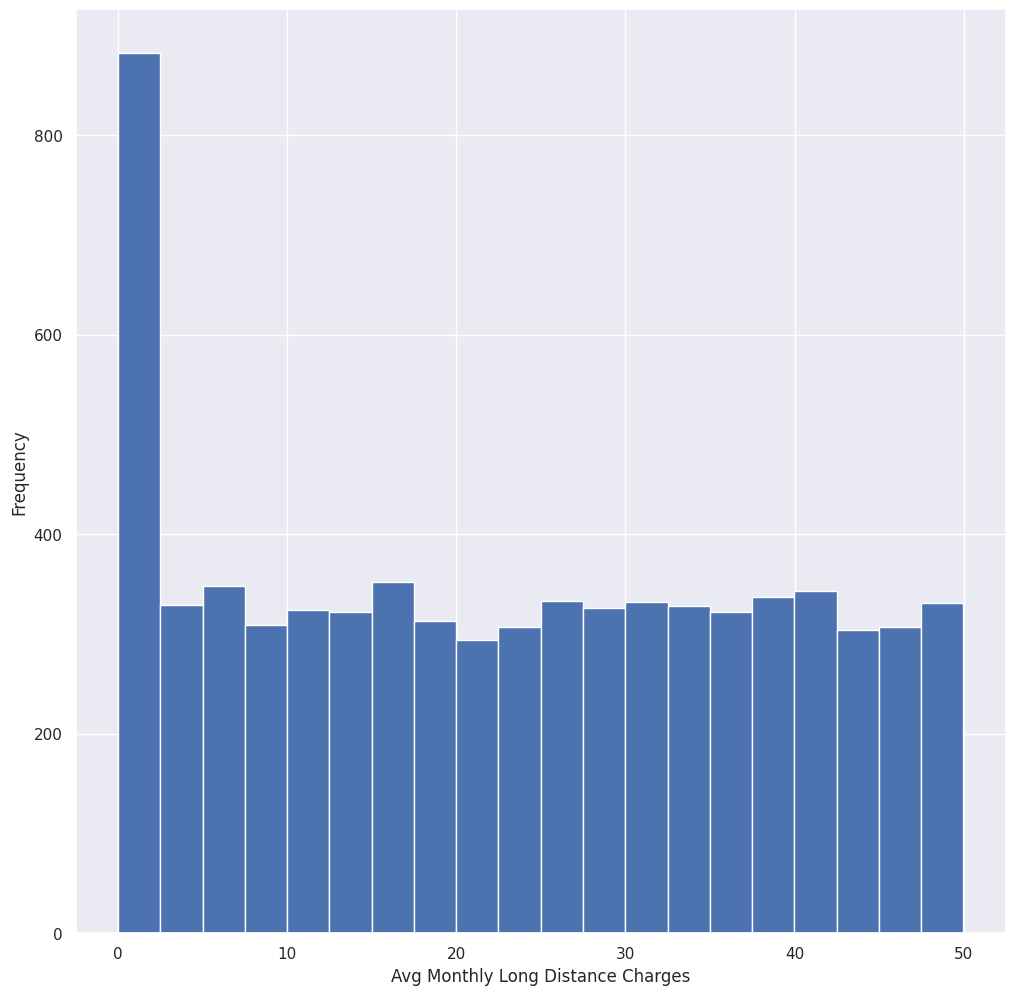

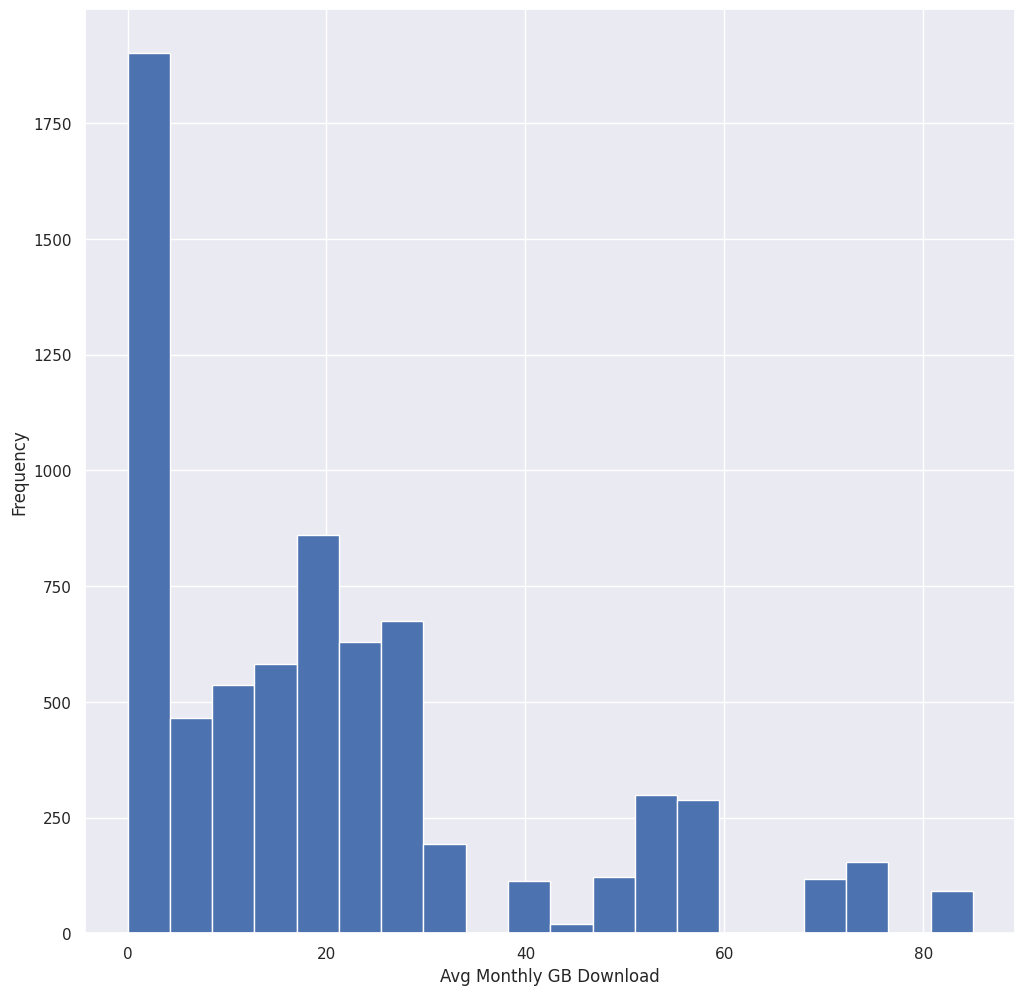

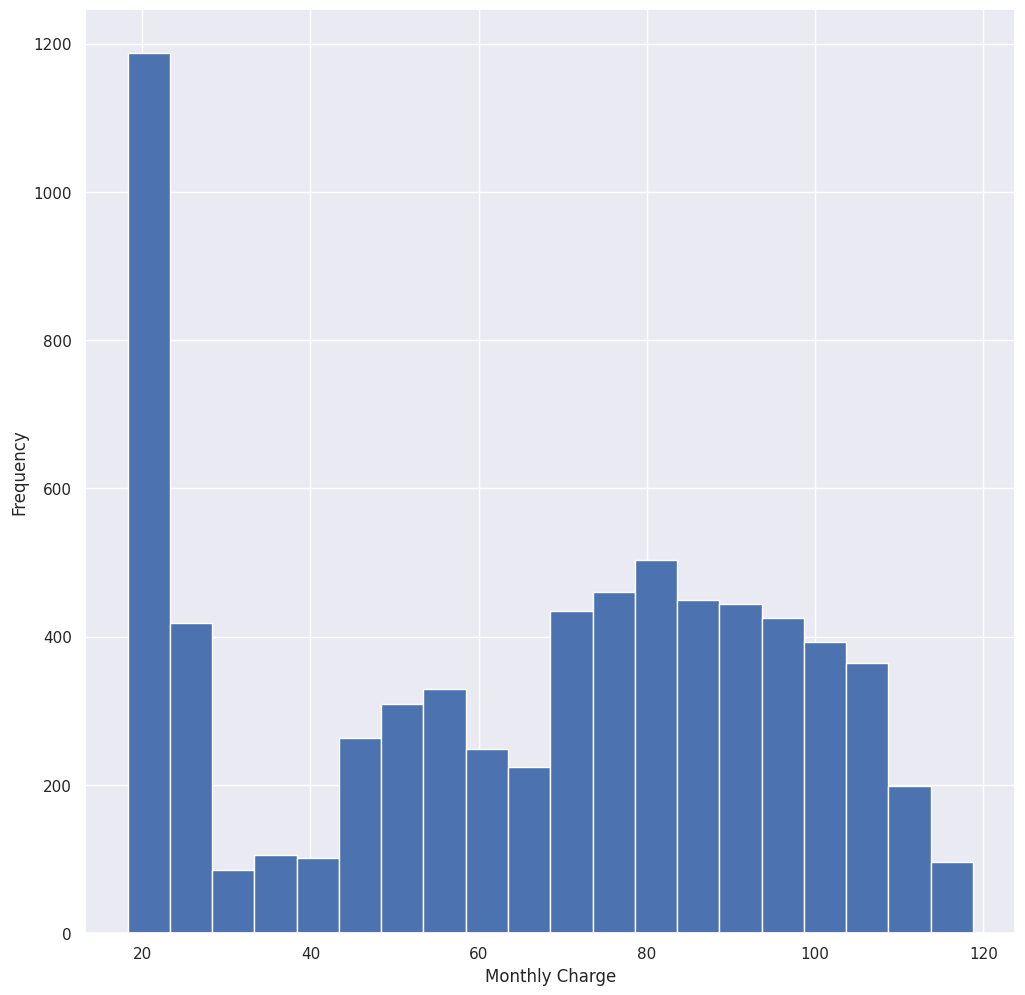

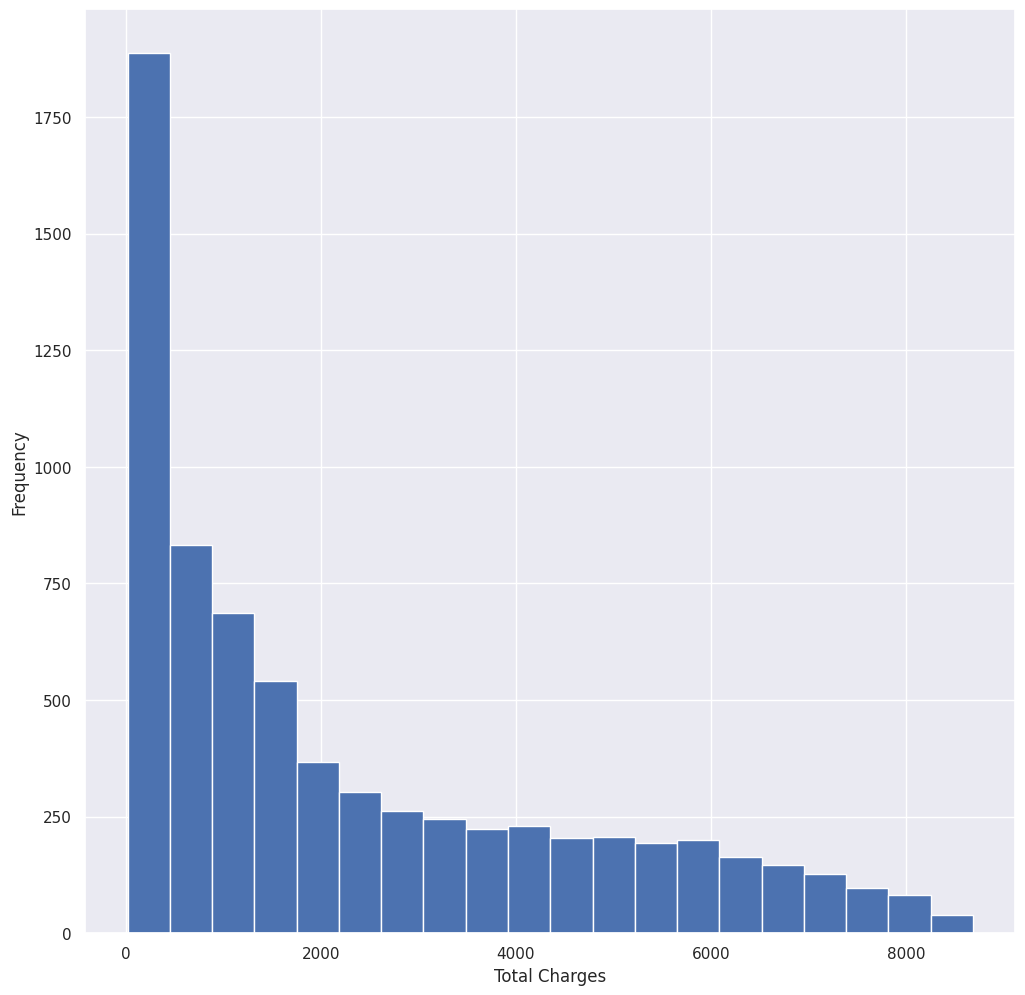

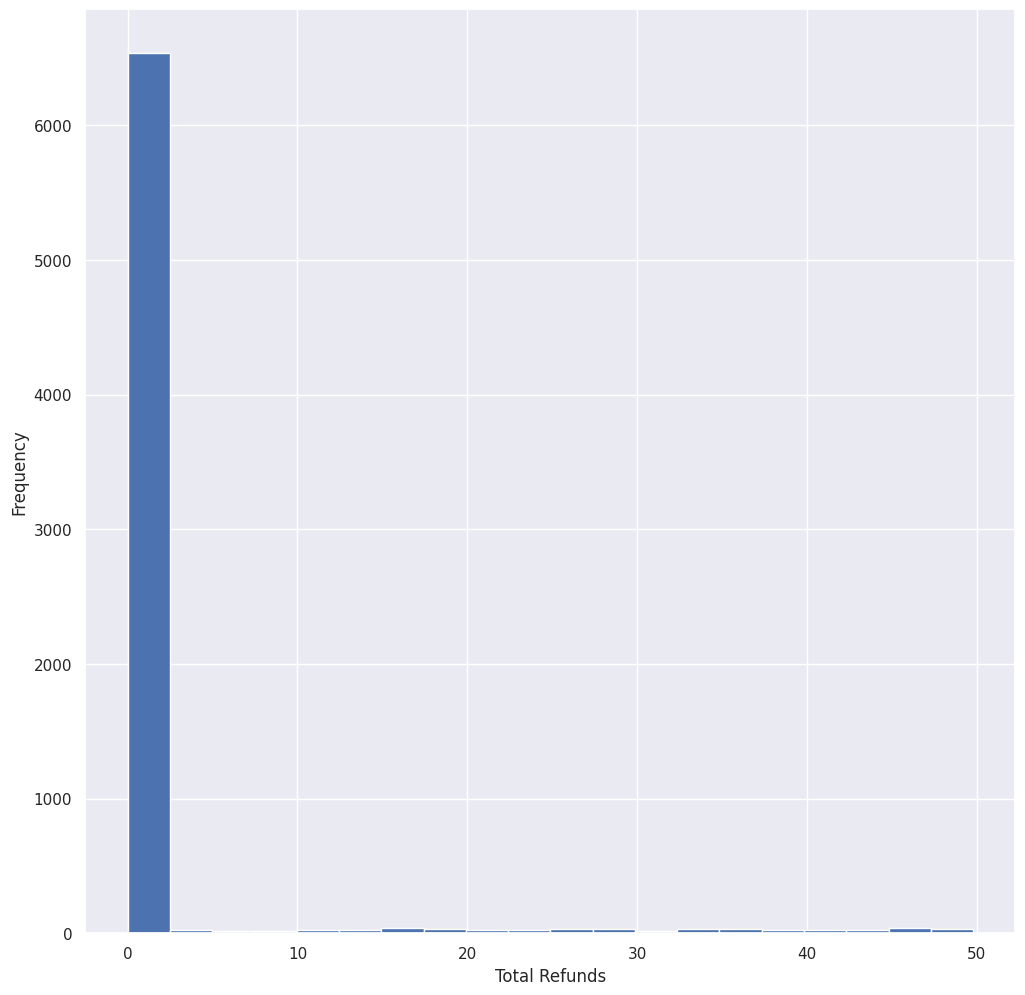

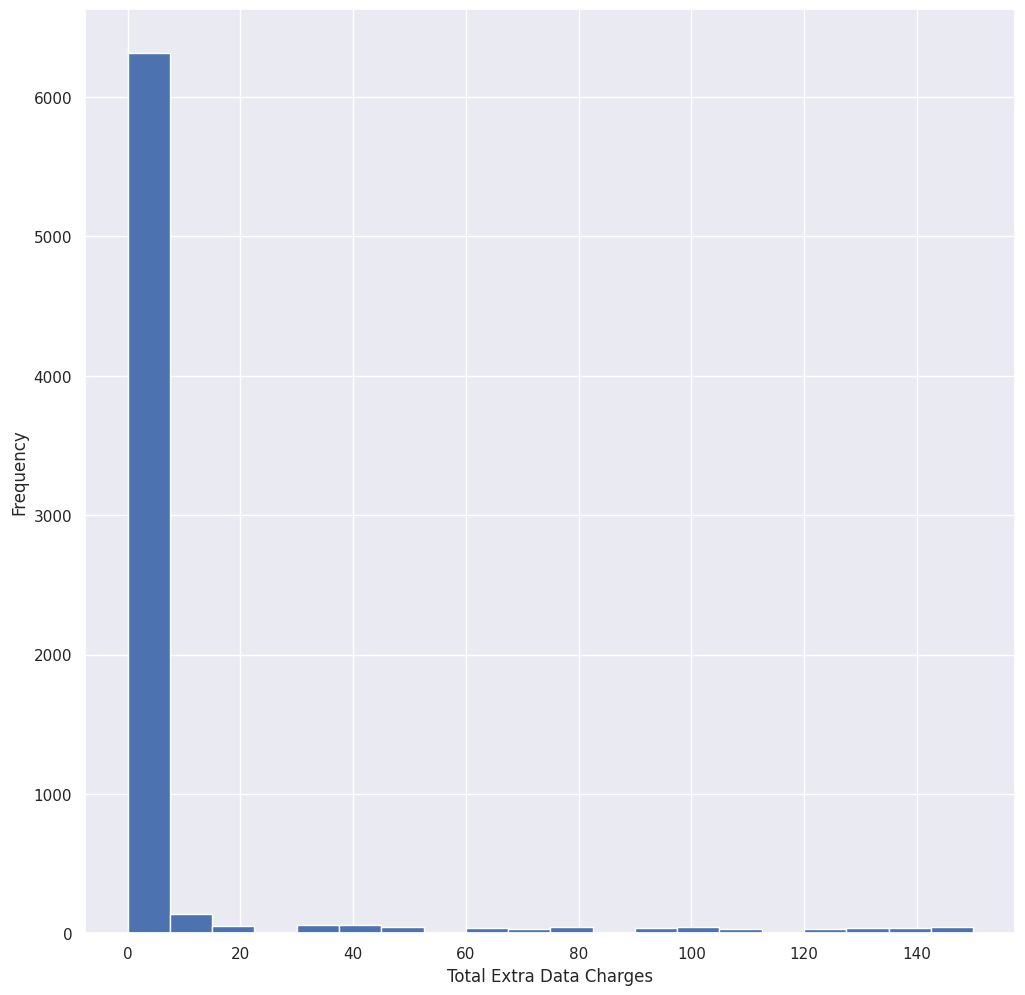

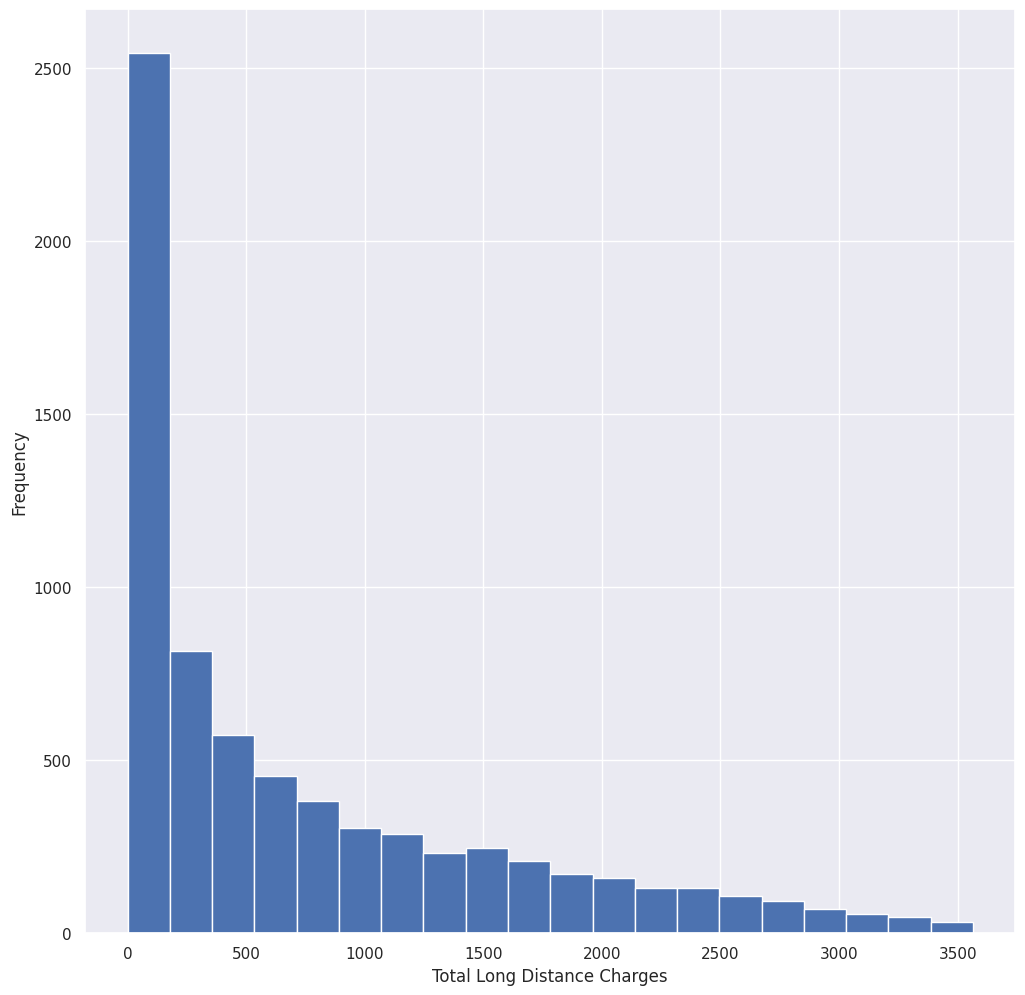

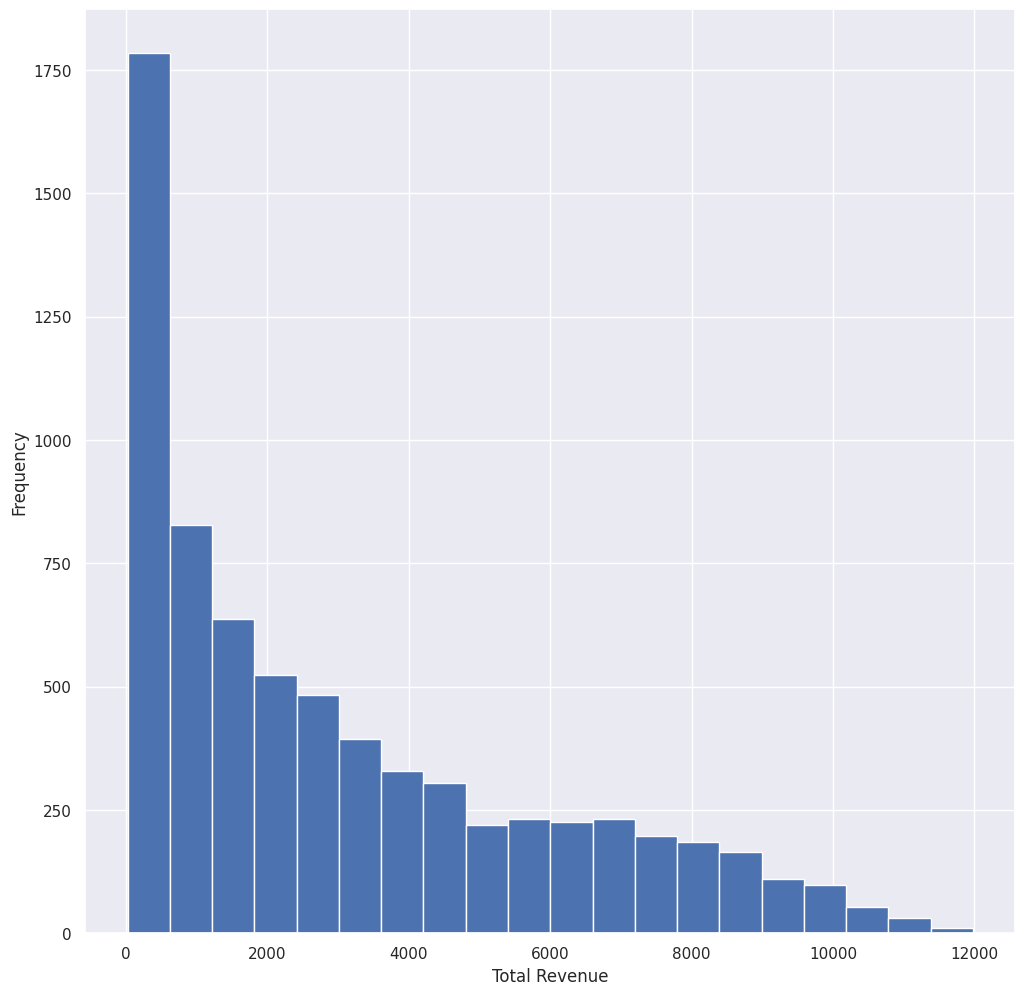

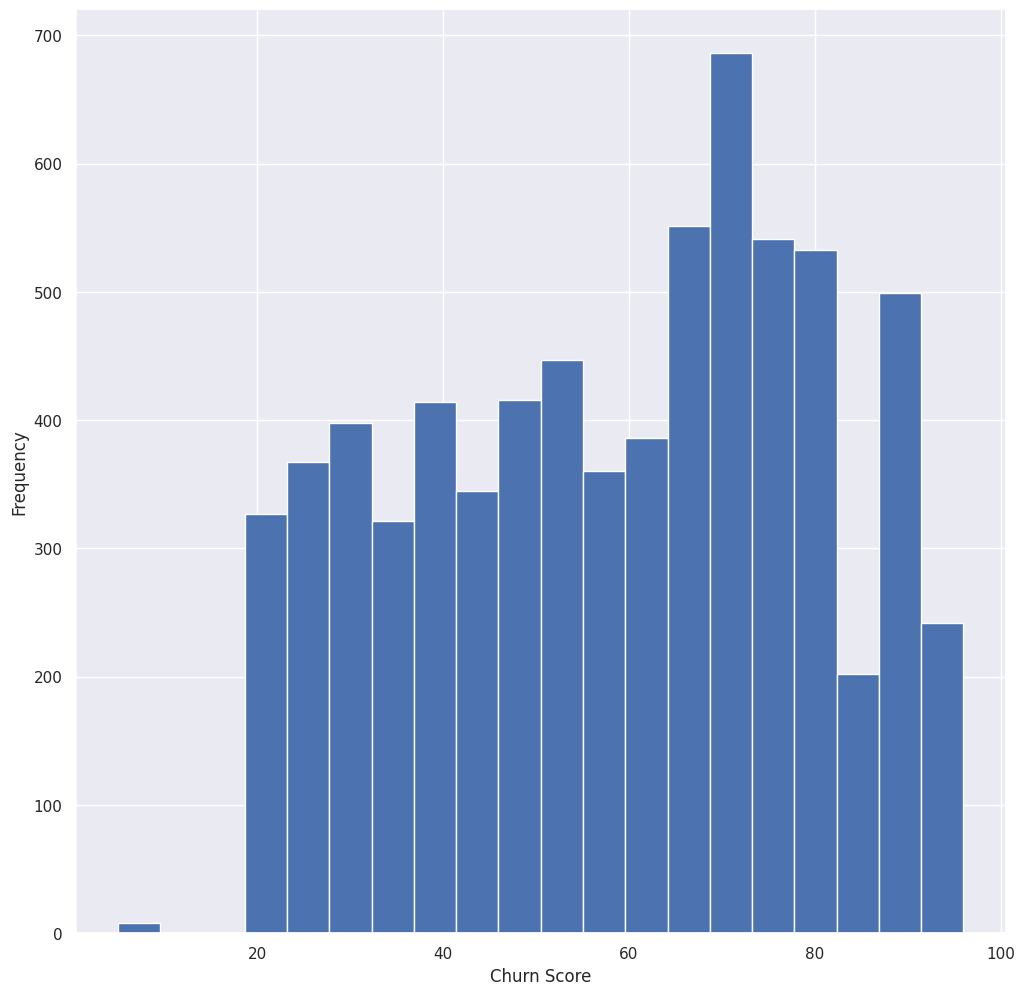

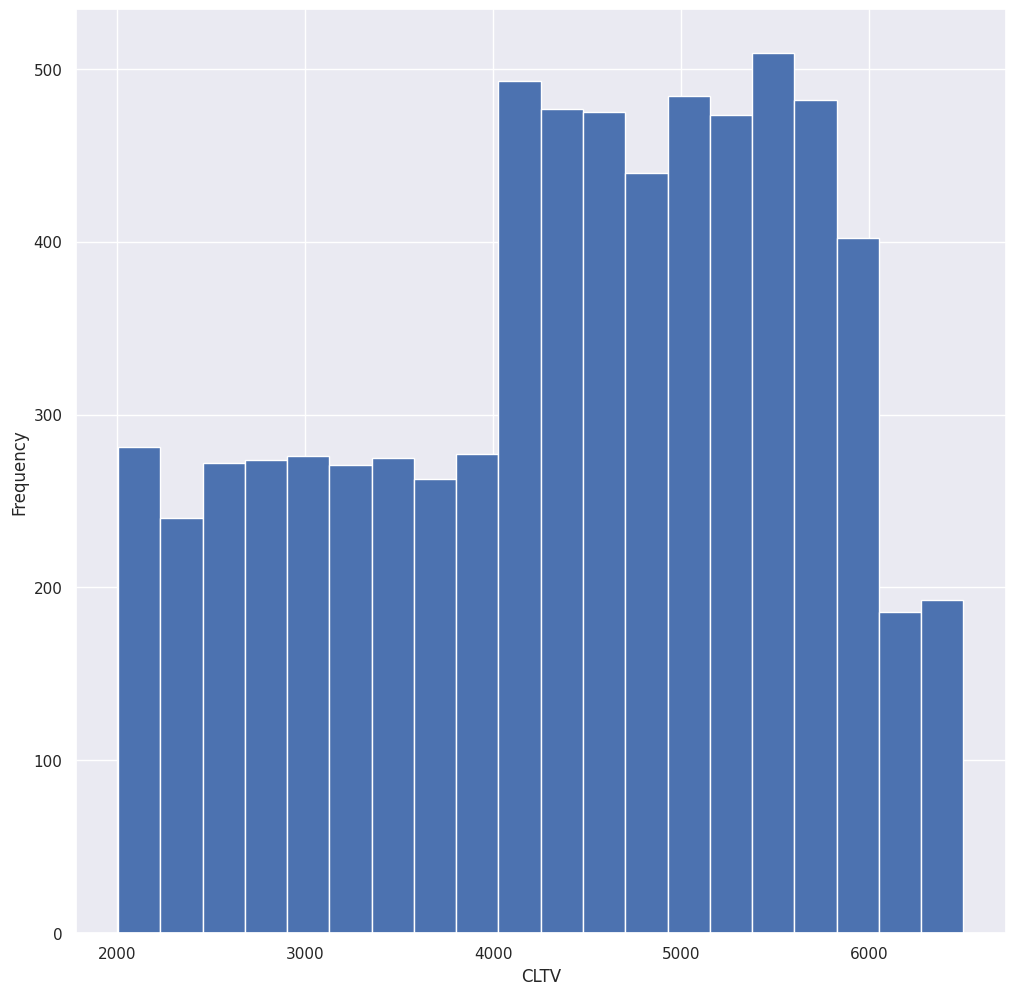

In [67]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


for col in cat_cols:
    cat_summary(df, col)


def hist_num_columns_show(dataframe, num_column):
    dataframe[num_column].hist(bins=20)
    plt.xlabel(num_column)
    plt.ylabel("Frequency")
    plt.show(block=True)


for num_col in num_cols:
    hist_num_columns_show(df, num_col)

Data Visualization 📊4️⃣


Matplotlib💥


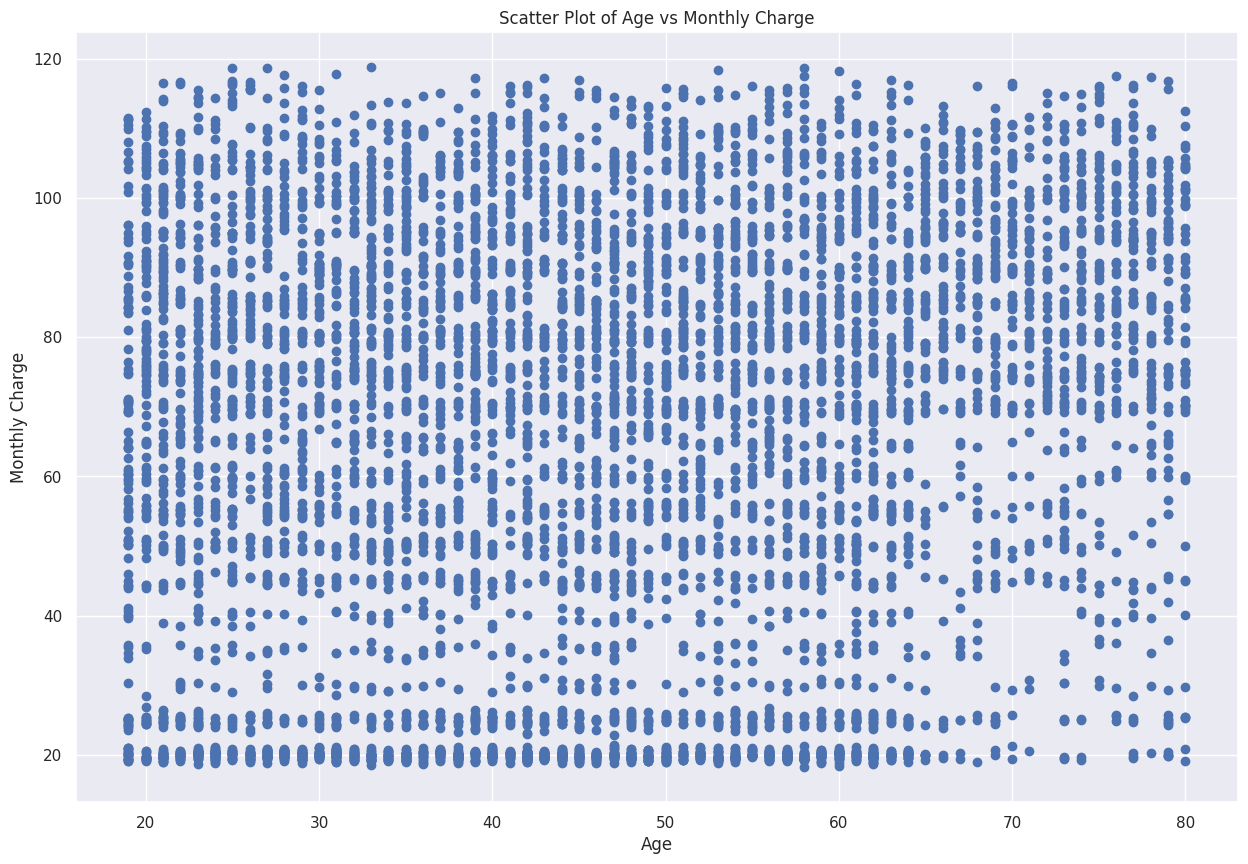

In [68]:
plt.figure(figsize=(15, 10))
plt.scatter(df['Age'], df['Monthly Charge'])
plt.xlabel('Age')
plt.ylabel('Monthly Charge')
plt.title('Scatter Plot of Age vs Monthly Charge')
plt.show()


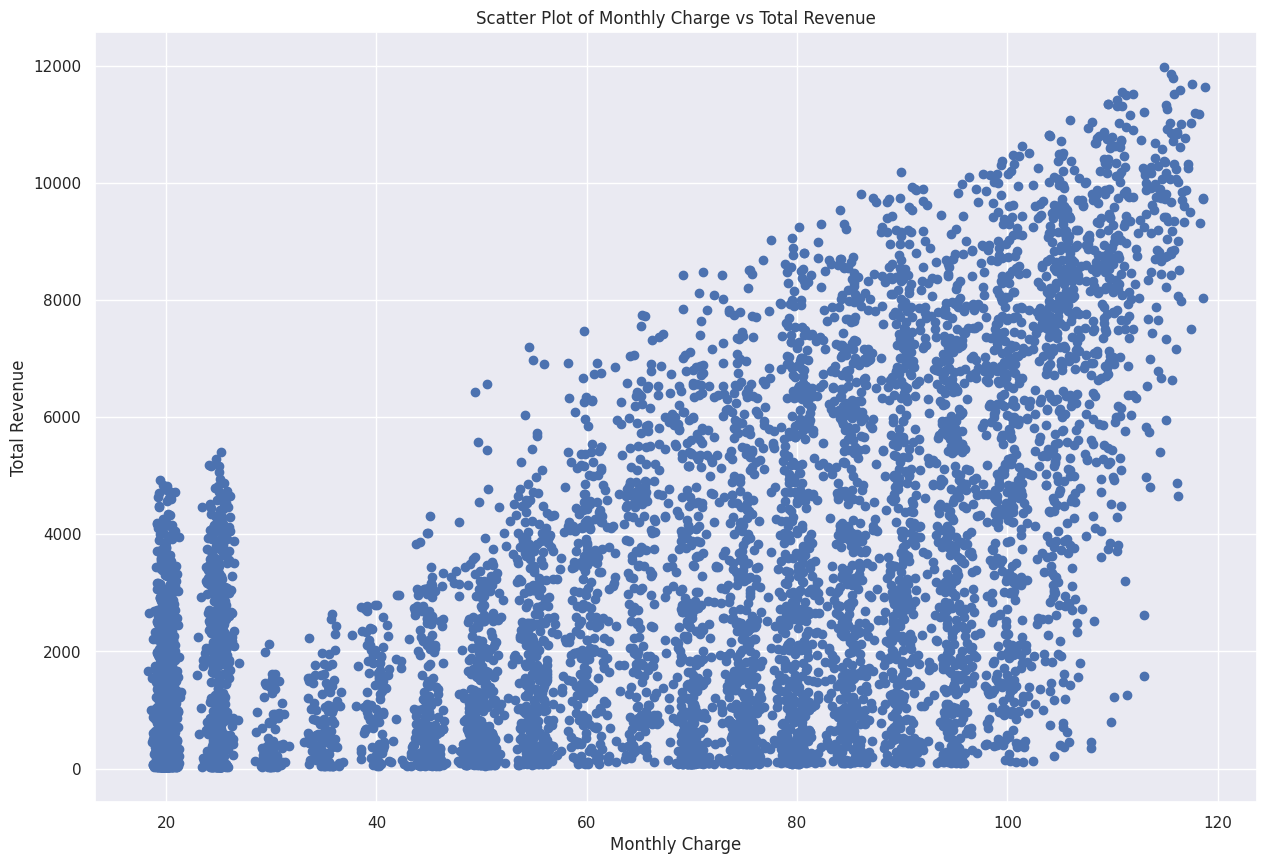

In [70]:
plt.figure(figsize=(15, 10))
plt.scatter(df['Monthly Charge'], df['Total Revenue'])
plt.xlabel('Monthly Charge')
plt.ylabel('Total Revenue')
plt.title('Scatter Plot of Monthly Charge vs Total Revenue')
plt.show()


Seaborn

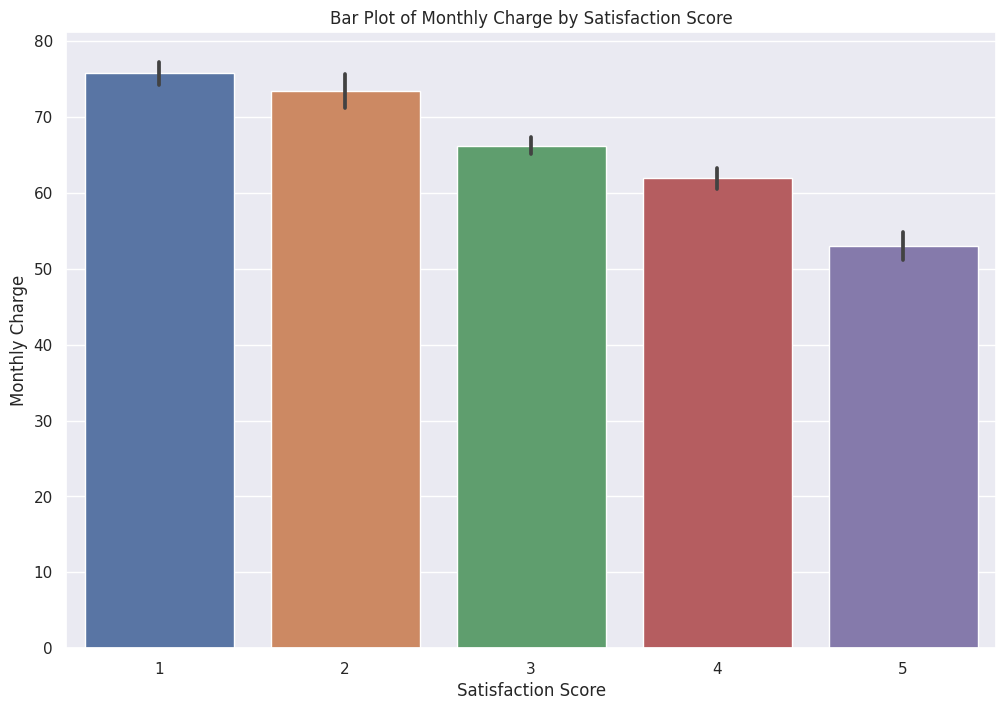

In [71]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Satisfaction Score", y="Monthly Charge", data=df)
plt.xlabel('Satisfaction Score')
plt.ylabel('Monthly Charge')
plt.title('Bar Plot of Monthly Charge by Satisfaction Score')
plt.show()


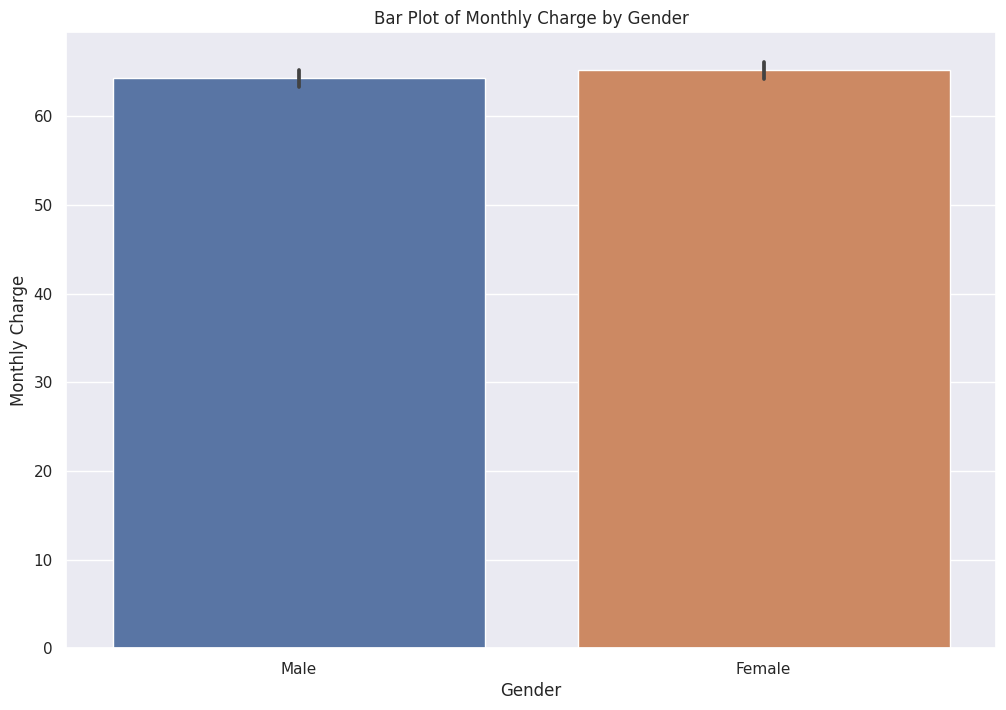

In [73]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Gender", y="Monthly Charge", data=df)
plt.xlabel('Gender')
plt.ylabel('Monthly Charge')
plt.title('Bar Plot of Monthly Charge by Gender')
plt.show()


Relationships Between Variables

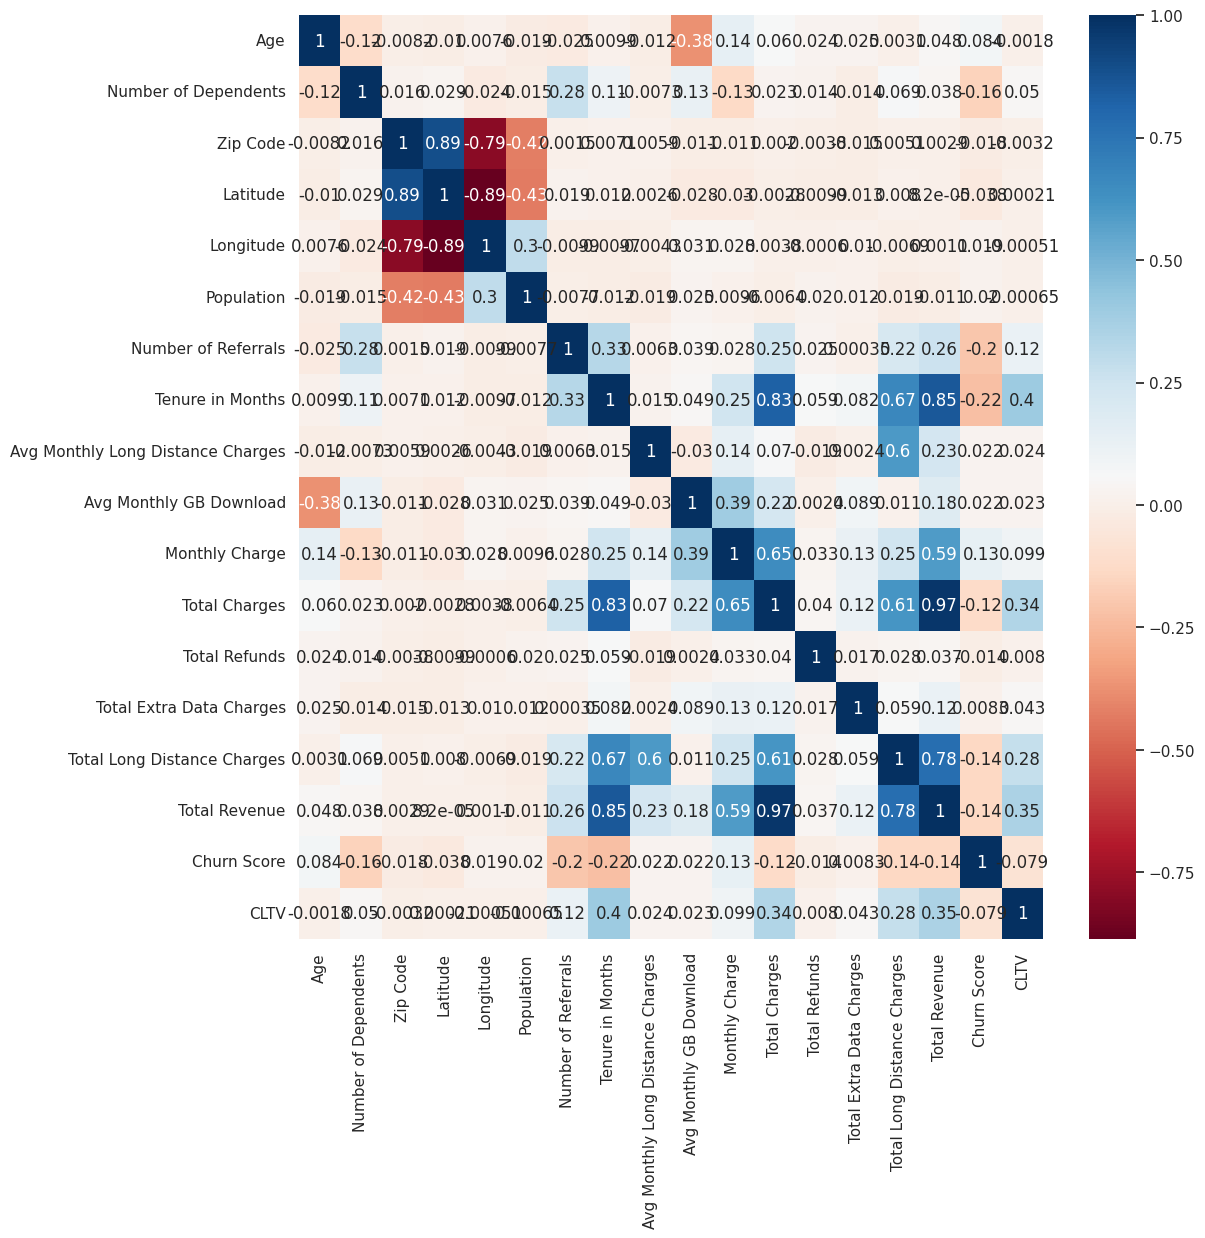

In [74]:
corr = df[num_cols].corr()

sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True)  
plt.show()

Feature Engineering

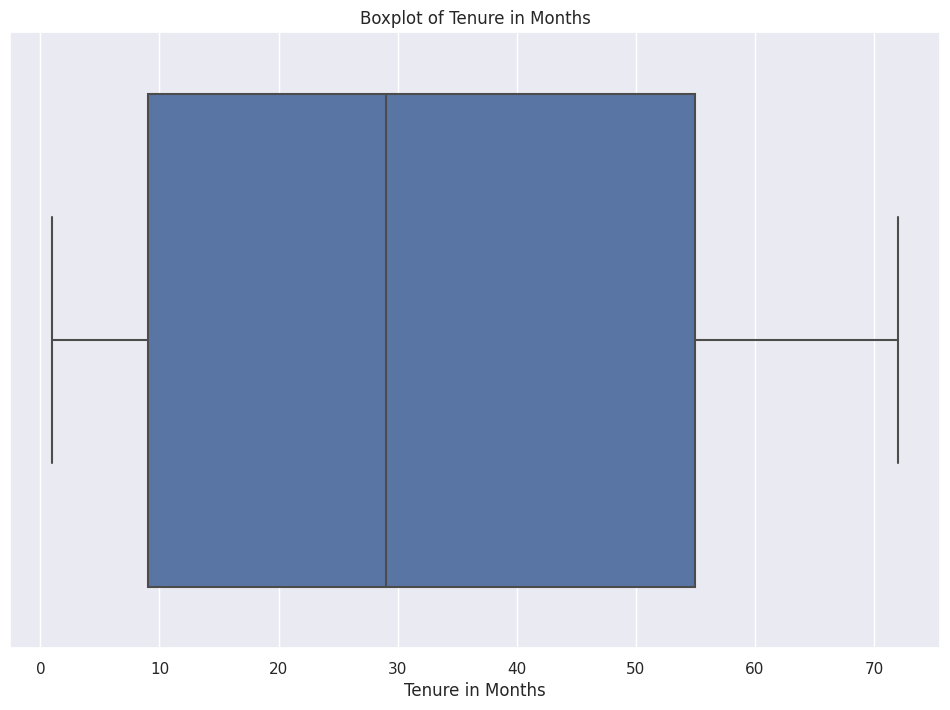

In [104]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df["Tenure in Months"])
plt.xlabel('Tenure in Months')
plt.title('Boxplot of Tenure in Months')
plt.show()
